# Project 7 

In this project, you will implement the the clustering techniques that you've learned this week. 

#### Step 1: Load the python libraries that you will need for this project 

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import metrics
import numpy as np
import sklearn
import psycopg2 as psy
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
from pandas import DataFrame
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

#### Step 2: Examine your data 

In [2]:
# Typically, a relational database is organized into tables. Each table should correspond to one entity or concept. 
# Each table is similar to a single CSV file or Pandas dataframe.

In [3]:
PATH = '/Users/cguy/Downloads'
df = pd.read_csv(PATH + '/airports.csv')
df2 = pd.read_csv(PATH + '/Airport_operations.csv')
df3 = pd.read_csv(PATH + '/airport_cancellations.csv')

In [4]:
print df.columns
print df2.columns
print df3.columns


Index([u'Key', u'LocID', u'AP_NAME', u'ALIAS', u'Facility Type', u'FAA REGION',
       u'COUNTY', u'CITY', u'STATE', u'AP Type', u'Latitude', u'Longitude',
       u'Boundary Data Available'],
      dtype='object')
Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay'],
      dtype='object')
Index([u'Airport', u'Year', u'Departure Cancellations',
       u'Arrival Cancellations', u'Departure Diversions',
       u'Arrival Diversions'],
      dtype='object')


In [5]:
#postgres doesn't like capitals or spaces

df.columns = [c.lower().replace(' ','_') for c in df.columns] 
df2.columns = [c.lower().replace(' ','_') for c in df2.columns]
df3.columns = [c.lower().replace(' ','_') for c in df3.columns]


In [6]:
print df.columns
print df2.columns
print df3.columns

Index([u'key', u'locid', u'ap_name', u'alias', u'facility_type', u'faa_region',
       u'county', u'city', u'state', u'ap_type', u'latitude', u'longitude',
       u'boundary_data_available'],
      dtype='object')
Index([u'airport', u'year', u'departures_for_metric_computation',
       u'arrivals_for_metric_computation', u'percent_on-time_gate_departures',
       u'percent_on-time_airport_departures', u'percent_on-time_gate_arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average_taxi_out_delay', u'average_airport_departure_delay',
       u'average_airborne_delay', u'average_taxi_in_delay',
       u'average_block_delay', u'average_gate_arrival_delay'],
      dtype='object')
Index([u'airport', u'year', u'departure_cancellations',
       u'arrival_cancellations', u'departure_diversions',
       u'arrival_diversions'],
      dtype='object')


In [7]:
df.head()

key locid                   ap_name  \
0  3443.0   STX           HENRY E ROHLSEN   
1  5088.0   X64                  PATILLAS   
2  2886.0   PSE                 MERCEDITA   
3  2879.0   VQS  ANTONIO RIVERA RODRIGUEZ   
4  2883.0   X63                   HUMACAO   

                                 alias facility_type faa_region  \
0        Henry E Rohlsen Int'l Airport       Airport        ASO   
1                                  NaN       Airport        ASO   
2                 Aeropuerto Mercedita       Airport        ASO   
3  Aeropuerto Antonio Rivera Rodr�guez       Airport        ASO   
4       Aeropuerto Regional De Humacao       Airport        ASO   

             county             city state     ap_type   latitude  longitude  \
0  -VIRGIN ISLANDS-    CHRISTIANSTED    VI  Public Use  17.701556 -64.801722   
1            #NAME?         PATILLAS    PR  Public Use  17.982189 -66.019330   
2            #NAME?            PONCE    PR  Public Use  18.008306 -66.563028   
3            #NAME?  ISLA DE VIEQUES    PR  Public Use  18.134811 -65.493617   
4            #NAME?          HUMACAO    PR  Public Use  18.138017 -65.800718   

  boundary_data_available  
0                     Yes  
1                      No  
2                     Yes  
3                     Yes  
4                     Yes

In [8]:
df2.head()

airport  year  departures_for_metric_computation  \
0     ABQ  2004                              53971   
1     ABQ  2005                              51829   
2     ABQ  2006                              49682   
3     ABQ  2007                              53255   
4     ABQ  2008                              49589   

   arrivals_for_metric_computation  percent_on-time_gate_departures  \
0                            53818                           0.8030   
1                            51877                           0.8140   
2                            51199                           0.7983   
3                            53611                           0.8005   
4                            49512                           0.8103   

   percent_on-time_airport_departures  percent_on-time_gate_arrivals  \
0                              0.7809                         0.7921   
1                              0.7922                         0.8001   
2                              0.7756                         0.7746   
3                              0.7704                         0.7647   
4                              0.7844                         0.7875   

   average_gate_departure_delay  average_taxi_out_time  \
0                         10.38                   9.89   
1                          9.60                   9.79   
2                         10.84                   9.89   
3                         11.29                  10.34   
4                         10.79                  10.41   

   average_taxi_out_delay  average_airport_departure_delay  \
0                    2.43                            12.10   
1                    2.29                            11.20   
2                    2.16                            12.33   
3                    2.40                            12.95   
4                    2.41                            12.32   

   average_airborne_delay  average_taxi_in_delay  average_block_delay  \
0                    2.46                   0.83                 2.55   
1                    2.26                   0.89                 2.34   
2                    2.12                   0.84                 2.66   
3                    2.19                   1.29                 3.06   
4                    1.82                   1.03                 2.79   

   average_gate_arrival_delay  
0                       10.87  
1                       10.24  
2                       11.82  
3                       12.71  
4                       11.48

In [9]:
df3.head()

airport    year  departure_cancellations  arrival_cancellations  \
0     ABQ  2004.0                    242.0                  235.0   
1     ABQ  2005.0                    221.0                  190.0   
2     ABQ  2006.0                    392.0                  329.0   
3     ABQ  2007.0                    366.0                  304.0   
4     ABQ  2008.0                    333.0                  300.0   

   departure_diversions  arrival_diversions  
0                  71.0                46.0  
1                  61.0                33.0  
2                  71.0               124.0  
3                 107.0                45.0  
4                  79.0                42.0

### Intro: Write a problem statement / aim for this project

Aims:

- analyze the operations of major airports around the country
- help FAA to cut down on delays nationwide
- Understand the characteristics and groupings of airports based on a dataset of departure and operational delays
- understand the distribution, characteristics, and components of individual airports operations that are leading to these delays
- Organize and store their data so that they can easily understand it after your consulting work is done
- modeling using principal component analysis

Problem Statment:

Which airports and operational characteristics should the FAA target to decrease delays?





Use your skills with PCA to uncover the core components of operations related to delays.

recommendations as to which airports and operational characteristics they should target to decrease delays.

Which operational features are most correlated with delays?

What should the airport's next steps be?

What operational factors are most directly correlated to delays?

Take a look at airports groupings - are there any relationships by region? Size?

Conduct a PCA to discover the principal components behind departure delays

### Part 1: Create a PostgreSQL database 

#### 1. Let's create a database where we can house our airport data

Postgres is a server-based database, which means that
there is a server process running (bind to some port), that
accepts requests (i.e. SQL queries). Your process connects
to the server and sends queries to the server which itself is
responsible to update the database files.

The sql extension is already loaded. To reload it, use:
  %reload_ext sql
Connect to the database. Note - enter your own connection string. For help on how to load the raw CSV file into a Postgres database, please refer to the documenatation in the lesson plan on previous SQL lessons.
Create your database in postrgres:
psql
user=# create database wine
user=# \quit

In [10]:
engine = create_engine('postgresql://localhost:5432')

In [11]:
# %load_ext sql
%reload_ext sql

/Users/cguy/anaconda/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/Users/cguy/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


Load our csv files into tables

In [47]:
#ALREADY DONE ABOVE

In [61]:
df.to_sql('airport_info', engine)
df2.to_sql('airport_ops', engine)
df3.to_sql('airport_cancels', engine)

In [12]:
%%sql postgresql://localhost:5432/
        
SELECT * FROM airport_info LIMIT 5;

5 rows affected.


[(0L, 3443.0, u'STX', u'HENRY E ROHLSEN', u"Henry E Rohlsen Int'l Airport", u'Airport', u'ASO', u'-VIRGIN ISLANDS-', u'CHRISTIANSTED', u'VI', u'Public Use', 17.701556, -64.801722, u'Yes'),
 (1L, 5088.0, u'X64', u'PATILLAS', None, u'Airport', u'ASO', u'#NAME?', u'PATILLAS', u'PR', u'Public Use', 17.982189, -66.01933, u'No'),
 (2L, 2886.0, u'PSE', u'MERCEDITA', u'Aeropuerto Mercedita', u'Airport', u'ASO', u'#NAME?', u'PONCE', u'PR', u'Public Use', 18.008306, -66.563028, u'Yes'),
 (3L, 2879.0, u'VQS', u'ANTONIO RIVERA RODRIGUEZ', u'Aeropuerto Antonio Rivera Rodr\ufffdguez', u'Airport', u'ASO', u'#NAME?', u'ISLA DE VIEQUES', u'PR', u'Public Use', 18.134811, -65.493617, u'Yes'),
 (4L, 2883.0, u'X63', u'HUMACAO', u'Aeropuerto Regional De Humacao', u'Airport', u'ASO', u'#NAME?', u'HUMACAO', u'PR', u'Public Use', 18.138017, -65.800718, u'Yes')]

In [13]:
%%sql 

SELECT * FROM airport_ops LIMIT 5;

5 rows affected.


[(0L, u'ABQ', 2004L, 53971L, 53818L, 0.803, 0.7809, 0.7921, 10.38, 9.89, 2.43, 12.1, 2.46, 0.83, 2.55, 10.87),
 (1L, u'ABQ', 2005L, 51829L, 51877L, 0.814, 0.7922, 0.8001, 9.6, 9.79, 2.29, 11.2, 2.26, 0.89, 2.34, 10.24),
 (2L, u'ABQ', 2006L, 49682L, 51199L, 0.7983, 0.7756, 0.7746, 10.84, 9.89, 2.16, 12.33, 2.12, 0.84, 2.66, 11.82),
 (3L, u'ABQ', 2007L, 53255L, 53611L, 0.8005, 0.7704, 0.7647, 11.29, 10.34, 2.4, 12.95, 2.19, 1.29, 3.06, 12.71),
 (4L, u'ABQ', 2008L, 49589L, 49512L, 0.8103, 0.7844, 0.7875, 10.79, 10.41, 2.41, 12.32, 1.82, 1.03, 2.79, 11.48)]

In [14]:
%%sql 

SELECT * FROM airport_cancels LIMIT 5;

5 rows affected.


[(0L, u'ABQ', 2004.0, 242.0, 235.0, 71.0, 46.0),
 (1L, u'ABQ', 2005.0, 221.0, 190.0, 61.0, 33.0),
 (2L, u'ABQ', 2006.0, 392.0, 329.0, 71.0, 124.0),
 (3L, u'ABQ', 2007.0, 366.0, 304.0, 107.0, 45.0),
 (4L, u'ABQ', 2008.0, 333.0, 300.0, 79.0, 42.0)]

In [15]:
%%sql 

SELECT COUNT(*) FROM airport_cancels LIMIT 5;

1 rows affected.


[(805L,)]

In [17]:
# Obsolete (returns all rows in airport_ops that do not have rows in airport_cancels):

In [424]:
%%sql 

SELECT ao.index, ao.airport FROM airport_ops ao
LEFT JOIN airport_cancels ac ON ao.index = ac.index AND ao.airport = ac.airport
WHERE ac.index IS NULL AND ac.airport IS NULL;

In [27]:
# Don't exist yet (returns all rows in airport_cancels that do not have rows in airport_ops):

In [425]:
%%sql 

SELECT ac.index, ac.airport FROM airport_cancels ac
LEFT JOIN airport_ops ao ON ao.index = ac.index AND ao.airport = ac.airport
WHERE ao.index IS NULL AND ao.airport IS NULL;

In [ ]:
#two tables don't match up.....will need to address

Query the database for our intial data

In [ ]:
# total # of cities

In [426]:
%%sql 

SELECT COUNT(DISTINCT city) FROM airport_info;

1 rows affected.


[(3745L,)]

In [427]:
%%sql 

SELECT COUNT(city) FROM airport_info;

1 rows affected.


[(5164L,)]

In [74]:


#table below also shows # of airports per city, I believe

In [73]:

%%sql 

SELECT city, COUNT(*) AS airports FROM airport_info GROUP BY city ORDER BY airports DESC;

3746 rows affected.


[(u'HOUSTON', 18L),
 (u'GREENVILLE', 13L),
 (u'COLUMBUS', 13L),
 (u'ATLANTA', 12L),
 (u'SPRINGFIELD', 11L),
 (u'CLINTON', 11L),
 (u'WASHINGTON', 11L),
 (u'WASILLA', 10L),
 (u'JACKSON', 10L),
 (u'COLUMBIA', 9L),
 (u'MARION', 9L),
 (u'INDIANAPOLIS', 9L),
 (u'NEW YORK', 8L),
 (u'PORTLAND', 8L),
 (u'LINCOLN', 8L),
 (u'YAKUTAT', 8L),
 (u'AUGUSTA', 8L),
 (u'LANCASTER', 8L),
 (u'JACKSONVILLE', 8L),
 (u'BUFFALO', 8L),
 (u'MONTICELLO', 8L),
 (u'AKRON', 8L),
 (u'SAN ANTONIO', 8L),
 (u'LEXINGTON', 8L),
 (u'FORT WORTH', 7L),
 (u'HILLSBORO', 7L),
 (u'ANCHORAGE', 7L),
 (u'LEBANON', 7L),
 (u'HAMILTON', 7L),
 (u'ASHLAND', 7L),
 (u'CLEVELAND', 7L),
 (u'EUREKA', 7L),
 (u'MOUNT PLEASANT', 7L),
 (u'WICHITA', 7L),
 (u'DALLAS', 7L),
 (u'DAYTON', 7L),
 (u'SALEM', 7L),
 (u'DECATUR', 7L),
 (u'MIAMI', 7L),
 (u'MADISON', 7L),
 (u'TOLEDO', 7L),
 (u'WINIFRED', 7L),
 (u'MARSHALL', 6L),
 (u'MINNEAPOLIS', 6L),
 (u'MOUNT VERNON', 6L),
 (u'TROY', 6L),
 (u'STOCKTON', 6L),
 (u'ROCHESTER', 6L),
 (u'BURLINGTON', 6L),
 (u'MONROE', 6L),
 (u'GEORGETOWN', 6L),
 (u'PLYMOUTH', 6L),
 (u'OXFORD', 6L),
 (u'CAMBRIDGE', 6L),
 (u'PALMER', 5L),
 (u'AUSTIN', 5L),
 (u'BIG LAKE', 5L),
 (u'JEFFERSON', 5L),
 (u'BUTLER', 5L),
 (u'PHILADELPHIA', 5L),
 (u'WILMINGTON', 5L),
 (u'HUNTSVILLE', 5L),
 (u'CLARKSVILLE', 5L),
 (u'AUBURN', 5L),
 (u'DANVILLE', 5L),
 (u'TRENTON', 5L),
 (u'CANTON', 5L),
 (u'CALDWELL', 5L),
 (u'ALBANY', 5L),
 (u'NEWPORT', 5L),
 (u'HAMPTON', 5L),
 (u'PETERSBURG', 5L),
 (u'WARREN', 5L),
 (u'NAPOLEON', 5L),
 (u'LIBERTY', 5L),
 (u'FRANKLIN', 5L),
 (u'NEWTON', 5L),
 (u'PERRY', 5L),
 (u'CHARLESTON', 5L),
 (u'GREENSBORO', 5L),
 (u'CHESTER', 5L),
 (u'BETHEL', 5L),
 (u'FAIRFIELD', 5L),
 (u'JAMESTOWN', 5L),
 (u'BALTIMORE', 5L),
 (u'MANSFIELD', 5L),
 (u'ST JOHNS', 5L),
 (u'ALMA', 4L),
 (u'CUMBERLAND', 4L),
 (u'JASPER', 4L),
 (u'STANLEY', 4L),
 (u'ALEXANDRIA', 4L),
 (u'SACRAMENTO', 4L),
 (u'ST LOUIS', 4L),
 (u'LAFAYETTE', 4L),
 (u'LAS VEGAS', 4L),
 (u'CORNING', 4L),
 (u'EL DORADO', 4L),
 (u'DENVER', 4L),
 (u'SHELBYVILLE', 4L),
 (u'ORLANDO', 4L),
 (u'CHARLOTTE', 4L),
 (u'KODIAK', 4L),
 (u'OKLAHOMA CITY', 4L),
 (u'GAINESVILLE', 4L),
 (u'ROME', 4L),
 (u'TECUMSEH', 4L),
 (u'INDEPENDENCE', 4L),
 (u'WARSAW', 4L),
 (u'HUNTINGTON', 4L),
 (u'CAMDEN', 4L),
 (u'HOT SPRINGS', 4L),
 (u'LOUISVILLE', 4L),
 (u'TAMPA', 4L),
 (u'NORFOLK', 4L),
 (u'RICHMOND', 4L),
 (u'SANGER', 4L),
 (u'AMARILLO', 4L),
 (u'QUINCY', 4L),
 (u'BEDFORD', 4L),
 (u'SEATTLE', 4L),
 (u'BENTON', 4L),
 (u'PITTSFIELD', 4L),
 (u'SYRACUSE', 4L),
 (u'KETCHIKAN', 4L),
 (u'SUPERIOR', 4L),
 (u'FAYETTEVILLE', 4L),
 (u'ANGOLA', 4L),
 (u'MEMPHIS', 4L),
 (u'COVINGTON', 4L),
 (u'WACO', 4L),
 (u'BOWLING GREEN', 4L),
 (u'CARROLLTON', 4L),
 (u'NASHVILLE', 4L),
 (u'PARIS', 4L),
 (u'SIDNEY', 4L),
 (u'LIVINGSTON', 4L),
 (u'MIDLAND', 4L),
 (u'LAUREL', 4L),
 (u'MACON', 4L),
 (u'SPARTA', 4L),
 (u'OSCEOLA', 4L),
 (u'PHOENIX', 4L),
 (u'DOUGLAS', 4L),
 (u'ARLINGTON', 4L),
 (u'FREMONT', 4L),
 (u'HOWELL', 3L),
 (u'WINONA', 3L),
 (u'ANDREWS', 3L),
 (u'ALEKNAGIK', 3L),
 (u'OTTAWA', 3L),
 (u'MOLINE', 3L),
 (u'LINDEN', 3L),
 (u'CONWAY', 3L),
 (u'WILLOW', 3L),
 (u'SOLDOTNA', 3L),
 (u'ATHENS', 3L),
 (u'TITUSVILLE', 3L),
 (u'MONTEZUMA', 3L),
 (u'WATERTOWN', 3L),
 (u'SPENCER', 3L),
 (u'ARDMORE', 3L),
 (u'MANCHESTER', 3L),
 (u'BROWNSVILLE', 3L),
 (u'ST MARYS', 3L),
 (u'WINNSBORO', 3L),
 (u'BRUNSWICK', 3L),
 (u'ST GEORGE', 3L),
 (u'RENO', 3L),
 (u'FREDERICKSBURG', 3L),
 (u'WEST PALM BEACH', 3L),
 (u'GETTYSBURG', 3L),
 (u'BEAVER', 3L),
 (u'SHELBY', 3L),
 (u'SEYMOUR', 3L),
 (u'CHATTANOOGA', 3L),
 (u'WEATHERFORD', 3L),
 (u'BLOOMFIELD', 3L),
 (u'OLATHE', 3L),
 (u'HARRISBURG', 3L),
 (u'ERIE', 3L),
 (u'SAN JUAN', 3L),
 (u'FORT LAUDERDALE', 3L),
 (u'ELKHART', 3L),
 (u'CELINA', 3L),
 (u'LAWRENCEVILLE', 3L),
 (u'PERU', 3L),
 (u'WEST POINT', 3L),
 (u'LEWISTON', 3L),
 (u'KNOXVILLE', 3L),
 (u'TULSA', 3L),
 (u'EUFAULA', 3L),
 (u'NEW ORLEANS', 3L),
 (u'FAIRMONT', 3L),
 (u'ORANGE', 3L),
 (u'RUSSELLVILLE', 3L),
 (u'GREELEY', 3L),
 (u'OMAHA', 3L),
 (u'WAVERLY', 3L),
 (u'CLEA

In [82]:
# total # of states

In [83]:
%%sql 

SELECT COUNT(DISTINCT state) FROM airport_info;

1 rows affected.


[(54L,)]

In [84]:
%%sql 

SELECT COUNT(state) FROM airport_info;

1 rows affected.


[(5164L,)]

In [ ]:
#table below also shows # of airports per state, I believe

In [16]:
%%sql 

SELECT state, COUNT(*) AS airports FROM airport_info GROUP BY state ORDER BY airports DESC;

In [ ]:
# total # of counties

In [88]:
%%sql 

SELECT COUNT(DISTINCT county) FROM airport_info;

1 rows affected.


[(1577L,)]

In [87]:
%%sql 

SELECT COUNT(county) FROM airport_info;

1 rows affected.


[(5164L,)]

In [ ]:
#table below also shows # of airports per county, I believe

In [89]:
%%sql 

SELECT county, COUNT(*) AS airports FROM airport_info GROUP BY county ORDER BY airports DESC;

1578 rows affected.


[(u'WASHINGTON', 52L),
 (u'LINCOLN', 38L),
 (u'FRANKLIN', 35L),
 (u'BETHEL', 33L),
 (u'JEFFERSON', 33L),
 (u'JACKSON', 33L),
 (u'MONTGOMERY', 29L),
 (u'BRISTOL BAY', 29L),
 (u'GRANT', 29L),
 (u'YUKON-KOYUKUK', 29L),
 (u'LAKE', 28L),
 (u'KUSKOKWIM', 28L),
 (u'MONROE', 28L),
 (u'CLARK', 28L),
 (u'MATANUSKA-SUSITNA', 27L),
 (u'MARION', 25L),
 (u'WAYNE', 24L),
 (u'MADISON', 24L),
 (u'ALEUTIAN ISLANDS', 23L),
 (u'POLK', 23L),
 (u'NOME', 22L),
 (u'CASS', 21L),
 (u'DOUGLAS', 20L),
 (u'KODIAK ISLAND', 20L),
 (u'VALLEY', 20L),
 (u'CLINTON', 20L),
 (u'ORANGE', 19L),
 (u'ADAMS', 19L),
 (u'VALDEZ-CHITNA-WHITIE', 18L),
 (u'BLAINE', 18L),
 (u'UPPER YUKON', 18L),
 (u'HAMILTON', 17L),
 (u'UNION', 17L),
 (u'SAN BERNARDINO', 17L),
 (u'CLAY', 17L),
 (u'MARSHALL', 17L),
 (u'KENAI-COOK INLET', 17L),
 (u'FAYETTE', 17L),
 (u'CARROLL', 16L),
 (u'PRINCE OF WALES', 16L),
 (u'SKAGWAY-YAKUTAT', 16L),
 (u'KERN', 16L),
 (u'BUTLER', 15L),
 (u'GREENE', 15L),
 (u'LOS ANGELES', 15L),
 (u'IDAHO', 15L),
 (u'SAN JUAN', 15L),
 (u'CUSTER', 15L),
 (u'BENTON', 15L),
 (u'KENT', 15L),
 (u'JOHNSON', 14L),
 (u'SUFFOLK', 14L),
 (u'OTTAWA', 14L),
 (u'YORK', 14L),
 (u'CUMBERLAND', 14L),
 (u'ST LOUIS', 14L),
 (u'ST CLAIR', 14L),
 (u'BROWN', 14L),
 (u'HANCOCK', 13L),
 (u'WADE HAMPTON', 13L),
 (u'ERIE', 13L),
 (u'MARICOPA', 13L),
 (u'FAIRBANKS NORTH STAR', 13L),
 (u'KING', 13L),
 (u'LEE', 13L),
 (u'HUMBOLDT', 12L),
 (u'KETCHIKAN GATEWAY', 12L),
 (u'#NAME?', 12L),
 (u'WARREN', 12L),
 (u'HENRY', 12L),
 (u'RICHLAND', 12L),
 (u'LIVINGSTON', 12L),
 (u'RIVERSIDE', 12L),
 (u'SAN DIEGO', 12L),
 (u'ANCHORAGE', 11L),
 (u'HARRIS', 11L),
 (u'LOGAN', 11L),
 (u'KNOX', 11L),
 (u'ESSEX', 11L),
 (u'COLUMBIA', 11L),
 (u'SHELBY', 11L),
 (u'DALLAS', 11L),
 (u'MORGAN', 11L),
 (u'DENTON', 11L),
 (u'LAWRENCE', 11L),
 (u'MOHAVE', 10L),
 (u'DELAWARE', 10L),
 (u'LYON', 10L),
 (u'HARDIN', 10L),
 (u'WRANGELL-PETERSBURG', 10L),
 (u'PENOBSCOT', 10L),
 (u'COOS', 10L),
 (u'WOOD', 10L),
 (u'CHEROKEE', 10L),
 (u'GARFIELD', 9L),
 (u'FRESNO', 9L),
 (u'SCOTT', 9L),
 (u'TARRANT', 9L),
 (u'KOBUK', 9L),
 (u'MERCER', 9L),
 (u'CARBON', 9L),
 (u'LANE', 9L),
 (u'PINAL', 9L),
 (u'SOMERSET', 9L),
 (u'JUNEAU', 9L),
 (u'WORCESTER', 9L),
 (u'HARRISON', 9L),
 (u'CRAWFORD', 9L),
 (u'SEDGWICK', 9L),
 (u'COOK', 9L),
 (u'FULTON', 9L),
 (u'LA SALLE', 8L),
 (u'LINN', 8L),
 (u'COCHISE', 8L),
 (u'LEWIS', 8L),
 (u'CARTER', 8L),
 (u'AROOSTOOK', 8L),
 (u'BOONE', 8L),
 (u'PULASKI', 8L),
 (u'RANDOLPH', 8L),
 (u'NAVAJO', 8L),
 (u'GRAYSON', 8L),
 (u'PERRY', 8L),
 (u'OKANOGAN', 8L),
 (u'SACRAMENTO', 8L),
 (u'ELMORE', 8L),
 (u'COCONINO', 8L),
 (u'BRAZORIA', 8L),
 (u'CALHOUN', 8L),
 (u'PISCATAQUIS', 8L),
 (u'CORDOVA-MCCARTHY', 8L),
 (u'JASPER', 8L),
 (u'GENESEE', 8L),
 (u'WISE', 8L),
 (u'FREMONT', 8L),
 (u'PIERCE', 8L),
 (u'BUTTE', 8L),
 (u'OSAGE', 8L),
 (u'WRIGHT', 7L),
 (u'CADDO', 7L),
 (u'BALDWIN', 7L),
 (u'MASON', 7L),
 (u'SAN JOAQUIN', 7L),
 (u'SENECA', 7L),
 (u'INYO', 7L),
 (u'DE KALB', 7L),
 (u'STEUBEN', 7L),
 (u'PUTNAM', 7L),
 (u'PIKE', 7L),
 (u'SHERIDAN', 7L),
 (u'EL PASO', 7L),
 (u'SEWARD', 7L),
 (u'WEBSTER', 7L),
 (u'CHIPPEWA', 7L),
 (u'HILLSBOROUGH', 7L),
 (u'SANILAC', 7L),
 (u'SUSSEX', 7L),
 (u'BEXAR', 7L),
 (u'DANE', 7L),
 (u'SISKIYOU', 7L),
 (u'FLATHEAD', 7L),
 (u'FORT BEND', 7L),
 (u'SITKA', 7L),
 (u'LANCASTER', 7L),
 (u'TULARE', 7L),
 (u'MIDDLESEX', 7L),
 (u'VOLUSIA', 7L),
 (u'DADE', 6L),
 (u'MC LENNAN', 6L),
 (u'MENDOCINO', 6L),
 (u'BEAVER', 6L),
 (u'CENTRE', 6L),
 (u'MACON', 6L),
 (u'ELLIS', 6L),
 (u'LENAWEE', 6L),
 (u'ROCKINGHAM', 6L),
 (u'TAYLOR', 6L),
 (u'HARTFORD', 6L),
 (u'SUMMIT', 6L),
 (u'SULLIVAN', 6L),
 (u'ONEIDA', 6L),
 (u'ROGERS', 6L),
 (u'BONNER', 6L),
 (u'PALM BEACH', 6L),
 (u'WALWORTH', 6L),
 (u'SALINE', 6L),
 (u'JONES', 6L),
 (u'MOBILE', 6L),
 (u'MODOC', 6L),
 (u'HURON', 6L),
 (u'NEWTON', 6L),
 (u'IMPERIAL', 6L),
 (u'MIAMI', 6L),
 (u'RACINE', 6L),
 (u'SONOMA', 6L),
 (u'MARTIN', 6L),
 (u'MERCED', 6L),
 (u'TRINITY', 6L),
 (u'PHILLIPS', 6L),
 (u'CALDWELL', 6L),
 (u'CHARLEVOIX', 6L),
 (u'GUILFORD', 6L),
 (u'DAWSON

In [90]:
# total # of airport

In [91]:
%%sql 

SELECT COUNT(DISTINCT ap_name) FROM airport_info;

1 rows affected.


[(4956L,)]

In [92]:
%%sql 

SELECT COUNT(ap_name) FROM airport_info;

1 rows affected.


[(5164L,)]

In [93]:
%%sql 

SELECT ap_name, COUNT(*) AS airports FROM airport_info GROUP BY ap_name ORDER BY airports DESC;

4957 rows affected.


[(u'JACKSON COUNTY', 5L),
 (u'MONROE COUNTY', 5L),
 (u'ARLINGTON MUNI', 4L),
 (u'PLYMOUTH MUNI', 4L),
 (u'FRANKLIN COUNTY', 3L),
 (u'TRI-CITY', 3L),
 (u'TRI-COUNTY', 3L),
 (u'SKY HARBOR', 3L),
 (u'MASON COUNTY', 3L),
 (u'GREENVILLE MUNI', 3L),
 (u'FULTON COUNTY', 3L),
 (u'SKYHAVEN', 3L),
 (u'CAMBRIDGE MUNI', 3L),
 (u'WESTPORT', 3L),
 (u'ORANGE COUNTY', 3L),
 (u'SHELBY COUNTY', 3L),
 (u'ALBANY MUNI', 3L),
 (u'EUREKA MUNI', 3L),
 (u'MARION MUNI', 3L),
 (u'GRANT COUNTY', 3L),
 (u'BOWMAN FIELD', 3L),
 (u'HOUSTON COUNTY', 3L),
 (u'BUFFALO MUNI', 3L),
 (u'MARION COUNTY', 3L),
 (u'SPRINGFIELD MUNI', 3L),
 (u'CLEVELAND MUNI', 3L),
 (u'COLUMBUS MUNI', 3L),
 (u'CALHOUN COUNTY', 3L),
 (None, 3L),
 (u'MADISON MUNI', 3L),
 (u'OSCEOLA MUNI', 3L),
 (u'CORNING MUNI', 3L),
 (u'KWIGILLINGOK', 2L),
 (u'YAKUTAT', 2L),
 (u'AKUTAN', 2L),
 (u'CENTERVILLE MUNI', 2L),
 (u'HILLSBORO MUNI', 2L),
 (u'BETHEL', 2L),
 (u'WARREN MUNI', 2L),
 (u'TUNTUTULIAK', 2L),
 (u'HUMBOLDT MUNI', 2L),
 (u'BOONE COUNTY', 2L),
 (u'MILLER', 2L),
 (u'TWIN LAKES', 2L),
 (u'HARSENS ISLAND', 2L),
 (u'MOORE COUNTY', 2L),
 (u'HAZELTON MUNI', 2L),
 (u'HAMPTON MUNI', 2L),
 (u'AKIACHAK', 2L),
 (u'ST GEORGE', 2L),
 (u'HORIZON', 2L),
 (u'LINCOLN', 2L),
 (u'FRANKLIN FIELD', 2L),
 (u'CLINTON MUNI', 2L),
 (u'FAYETTE COUNTY', 2L),
 (u'MARSHALL COUNTY', 2L),
 (u'NEWPORT MUNI', 2L),
 (u'KAKE', 2L),
 (u'HUNTSVILLE MUNI', 2L),
 (u'FRIDAY HARBOR', 2L),
 (u'RUSK COUNTY', 2L),
 (u'ROBERTSON FIELD', 2L),
 (u'BLOOMFIELD MUNI', 2L),
 (u'AUGUSTA', 2L),
 (u'EAGLES NEST', 2L),
 (u'OAKLEY MUNI', 2L),
 (u'LEBANON MUNI', 2L),
 (u'SMITH FIELD', 2L),
 (u'WARSAW MUNI', 2L),
 (u'LINCOLN MUNI', 2L),
 (u'ARNOLD FIELD', 2L),
 (u'CONCHAS LAKE', 2L),
 (u'SUPERIOR MUNI', 2L),
 (u'MC GRATH', 2L),
 (u'TRACY MUNI', 2L),
 (u'ELLINGTON', 2L),
 (u'NORTH COUNTRY', 2L),
 (u'FIELD OF DREAMS', 2L),
 (u'EMPIRE', 2L),
 (u'HUNTINGTON MUNI', 2L),
 (u'INDEPENDENCE MUNI', 2L),
 (u'WASHINGTON COUNTY', 2L),
 (u'TRENTON MUNI', 2L),
 (u'BEAVER MUNI', 2L),
 (u'ENTERPRISE MUNI', 2L),
 (u'MADISONVILLE MUNI', 2L),
 (u'AUBURN MUNI', 2L),
 (u'DUBOIS MUNI', 2L),
 (u'FAIRVIEW', 2L),
 (u'RICHLAND', 2L),
 (u'CASSVILLE MUNI', 2L),
 (u'WRANGELL', 2L),
 (u'SIDNEY MUNI', 2L),
 (u'MERCER COUNTY', 2L),
 (u'LAWRENCE MUNI', 2L),
 (u'HENDERSON FIELD', 2L),
 (u'WAYNE COUNTY', 2L),
 (u'FAIRFIELD COUNTY', 2L),
 (u'FREMONT MUNI', 2L),
 (u'NEWTON MUNI', 2L),
 (u'GREENVILLE', 2L),
 (u'PERRY COUNTY', 2L),
 (u'PERRY MUNI', 2L),
 (u'COTTONWOOD', 2L),
 (u'KLAWOCK', 2L),
 (u'LAMAR MUNI', 2L),
 (u'HORSESHOE BEND', 2L),
 (u'TWIN BRIDGES', 2L),
 (u'CHEROKEE COUNTY', 2L),
 (u'CAPITAL CITY', 2L),
 (u'NEWTOK', 2L),
 (u'STURGIS MUNI', 2L),
 (u'GRAND MARAIS/COOK COUNTY', 2L),
 (u'JOHNSON COUNTY', 2L),
 (u'PITTSFIELD MUNI', 2L),
 (u'CALDWELL MUNI', 2L),
 (u'FAIRFIELD MUNI', 2L),
 (u'TAYLOR COUNTY', 2L),
 (u'BOONVILLE', 2L),
 (u'LIVINGSTON MUNI', 2L),
 (u'HARRISON COUNTY', 2L),
 (u'SKY MANOR', 2L),
 (u'ALEXANDRIA', 2L),
 (u'LOGAN COUNTY', 2L),
 (u'OCEAN CITY MUNI', 2L),
 (u'DAVIS FIELD', 2L),
 (u'SKAGWAY', 2L),
 (u'MANSFIELD MUNI', 2L),
 (u'MARTIN FIELD', 2L),
 (u'WALES', 2L),
 (u'CROSBY MUNI', 2L),
 (u'COLUMBIA', 2L),
 (u'HOONAH', 2L),
 (u'WINNSBORO MUNI', 2L),
 (u'PORTLAND MUNI', 2L),
 (u'FLORA MUNI', 2L),
 (u'CARROLL COUNTY', 2L),
 (u'WOOD COUNTY', 2L),
 (u'LITCHFIELD MUNI', 2L),
 (u'PUTNAM COUNTY', 2L),
 (u'MORGAN COUNTY', 2L),
 (u'PICKENS COUNTY', 2L),
 (u'HENRY COUNTY', 2L),
 (u'GARDNER MUNI', 2L),
 (u'LAKE COUNTY', 2L),
 (u'SUMMIT', 2L),
 (u'EUREKA', 2L),
 (u'RANKIN', 2L),
 (u'LA PORTE MUNI', 2L),
 (u'QUINCY MUNI', 2L),
 (u'LONG LAKE', 2L),
 (u'JACKSON MUNI', 2L),
 (u'LAKE LOUISE', 2L),
 (u'NEWPORT STATE', 2L),
 (u'MOUNT PLEASANT MUNI', 2L),
 (u'PRINCETON MUNI', 2L),
 (u'SMYRNA', 2L),
 (u'COVINGTON MUNI', 2L),
 (u'ANVIK', 2L),
 (u'DAVIS', 2L),
 (u'HAMILTON MUNI', 2L),
 (u'DOUGLAS MUNI', 2L),
 (u'TAYLOR', 2L),
 (u'WOODBINE MUNI', 2L),
 (u'MAPLE GROVE', 2L),
 (u'ISLAND LAKE', 2L),
 (u'SELDOVIA', 2L),
 (u'SUNBURY', 2L),
 (u'POCAHONTAS MUNI', 2L),
 (u'HAINES', 2L),
 (u'B

In [ ]:
# total # of locid

In [94]:
%%sql 

SELECT COUNT(DISTINCT locid) FROM airport_info;

1 rows affected.


[(5152L,)]

In [95]:
%%sql 

SELECT COUNT(locid) FROM airport_info;

1 rows affected.


[(5152L,)]

In [96]:
#table below shows that locid = airport (in other two tables)

In [97]:
%%sql 

SELECT locid, COUNT(*) AS airports FROM airport_info GROUP BY locid ORDER BY airports DESC;

5153 rows affected.


[(None, 15L),
 (u'M12', 1L),
 (u'4F8', 1L),
 (u'K79', 1L),
 (u'5R7', 1L),
 (u'SBU', 1L),
 (u'ELP', 1L),
 (u'BNA', 1L),
 (u'BID', 1L),
 (u'O74', 1L),
 (u'S27', 1L),
 (u'60C', 1L),
 (u'CID', 1L),
 (u'K82', 1L),
 (u'OIN', 1L),
 (u'ESN', 1L),
 (u'3S5', 1L),
 (u'FSP', 1L),
 (u'41A', 1L),
 (u'LND', 1L),
 (u'GEY', 1L),
 (u'42A', 1L),
 (u'AK7', 1L),
 (u'13Q', 1L),
 (u'21M', 1L),
 (u'LGB', 1L),
 (u'2F6', 1L),
 (u'N09', 1L),
 (u'SHR', 1L),
 (u'BLH', 1L),
 (u'JCT', 1L),
 (u'CEW', 1L),
 (u'CWF', 1L),
 (u'6N5', 1L),
 (u'5Y2', 1L),
 (u'4AK0', 1L),
 (u'CEV', 1L),
 (u'OGG', 1L),
 (u'LQR', 1L),
 (u'03D', 1L),
 (u'0N6', 1L),
 (u'HYI', 1L),
 (u'O65', 1L),
 (u'RBG', 1L),
 (u'S98', 1L),
 (u'94R', 1L),
 (u'I12', 1L),
 (u'MCN', 1L),
 (u'RRQ', 1L),
 (u'OWX', 1L),
 (u'SNC', 1L),
 (u'2VA', 1L),
 (u'5P5', 1L),
 (u'9S4', 1L),
 (u'IDL', 1L),
 (u'RZL', 1L),
 (u'MEY', 1L),
 (u'OMK', 1L),
 (u'ALI', 1L),
 (u'I66', 1L),
 (u'GQQ', 1L),
 (u'C20', 1L),
 (u'48S', 1L),
 (u'LMO', 1L),
 (u'GEG', 1L),
 (u'MAF', 1L),
 (u'1I3', 1L),
 (u'3Z8', 1L),
 (u'DUB', 1L),
 (u'PVW', 1L),
 (u'C16', 1L),
 (u'40U', 1L),
 (u'HDI', 1L),
 (u'E14', 1L),
 (u'CXO', 1L),
 (u'HDN', 1L),
 (u'AHN', 1L),
 (u'E58', 1L),
 (u'CJJ', 1L),
 (u'6K5', 1L),
 (u'U63', 1L),
 (u'PEZ', 1L),
 (u'APN', 1L),
 (u'KMY', 1L),
 (u'MWH', 1L),
 (u'MHV', 1L),
 (u'LNS', 1L),
 (u'36H', 1L),
 (u'SAV', 1L),
 (u'14I', 1L),
 (u'33A', 1L),
 (u'E25', 1L),
 (u'CZG', 1L),
 (u'0F2', 1L),
 (u'MJQ', 1L),
 (u'AHH', 1L),
 (u'GKY', 1L),
 (u'I23', 1L),
 (u'SHX', 1L),
 (u'UNK', 1L),
 (u'26R', 1L),
 (u'SBO', 1L),
 (u'CTJ', 1L),
 (u'28A', 1L),
 (u'09S', 1L),
 (u'DRI', 1L),
 (u'0A3', 1L),
 (u'5L0', 1L),
 (u'6W0', 1L),
 (u'FAI', 1L),
 (u'RWV', 1L),
 (u'MIV', 1L),
 (u'HYL', 1L),
 (u'MYR', 1L),
 (u'PLB', 1L),
 (u'MUT', 1L),
 (u'6U5', 1L),
 (u'GYB', 1L),
 (u'UKL', 1L),
 (u'MWC', 1L),
 (u'RIL', 1L),
 (u'CLS', 1L),
 (u'HOT', 1L),
 (u'O63', 1L),
 (u'MCW', 1L),
 (u'MLE', 1L),
 (u'L66', 1L),
 (u'93C', 1L),
 (u'00S', 1L),
 (u'Z25', 1L),
 (u'BTY', 1L),
 (u'PIH', 1L),
 (u'S97', 1L),
 (u'PBX', 1L),
 (u'K32', 1L),
 (u'HZY', 1L),
 (u'GOV', 1L),
 (u'H96', 1L),
 (u'52A', 1L),
 (u'U51', 1L),
 (u'CFK', 1L),
 (u'PRO', 1L),
 (u'EYW', 1L),
 (u'EYQ', 1L),
 (u'OEL', 1L),
 (u'BKX', 1L),
 (u'S18', 1L),
 (u'ERY', 1L),
 (u'5B5', 1L),
 (u'CHO', 1L),
 (u'Y46', 1L),
 (u'PNA', 1L),
 (u'ACK', 1L),
 (u'9W3', 1L),
 (u'08N', 1L),
 (u'2S5', 1L),
 (u'ULM', 1L),
 (u'FZG', 1L),
 (u'S16', 1L),
 (u'Y49', 1L),
 (u'L93', 1L),
 (u'DZB', 1L),
 (u'AVO', 1L),
 (u'B19', 1L),
 (u'CIN', 1L),
 (u'8K2', 1L),
 (u'TKA', 1L),
 (u'ITH', 1L),
 (u'3G4', 1L),
 (u'Y34', 1L),
 (u'DUG', 1L),
 (u'W10', 1L),
 (u'MBL', 1L),
 (u'4K6', 1L),
 (u'0G0', 1L),
 (u'TIP', 1L),
 (u'5B4', 1L),
 (u'PNS', 1L),
 (u'TNU', 1L),
 (u'F10', 1L),
 (u'T90', 1L),
 (u'HNZ', 1L),
 (u'0P1', 1L),
 (u'E38', 1L),
 (u'5M0', 1L),
 (u'AMG', 1L),
 (u'MCX', 1L),
 (u'7S6', 1L),
 (u'BTR', 1L),
 (u'EMP', 1L),
 (u'ANP', 1L),
 (u'6M0', 1L),
 (u'SGY', 1L),
 (u'78R', 1L),
 (u'48Y', 1L),
 (u'D79', 1L),
 (u'SAS', 1L),
 (u'6S3', 1L),
 (u'23S', 1L),
 (u'6Y6', 1L),
 (u'BTA', 1L),
 (u'58A', 1L),
 (u'BIS', 1L),
 (u'MAO', 1L),
 (u'MTJ', 1L),
 (u'O42', 1L),
 (u'M93', 1L),
 (u'T59', 1L),
 (u'JYM', 1L),
 (u'TSP', 1L),
 (u'SVA', 1L),
 (u'EZF', 1L),
 (u'49N', 1L),
 (u'SKX', 1L),
 (u'RVN', 1L),
 (u'GNU', 1L),
 (u'FLO', 1L),
 (u'0K6', 1L),
 (u'LKR', 1L),
 (u'N81', 1L),
 (u'GYL', 1L),
 (u'1D8', 1L),
 (u'09Y', 1L),
 (u'C47', 1L),
 (u'INR', 1L),
 (u'64G', 1L),
 (u'Z43', 1L),
 (u'FNL', 1L),
 (u'BB0', 1L),
 (u'3N6', 1L),
 (u'7A4', 1L),
 (u'3H5', 1L),
 (u'IIK', 1L),
 (u'7B3', 1L),
 (u'MCO', 1L),
 (u'00R', 1L),
 (u'MKE', 1L),
 (u'C89', 1L),
 (u'GXY', 1L),
 (u'38D', 1L),
 (u'26U', 1L),
 (u'82A', 1L),
 (u'GUY', 1L),
 (u'SHD', 1L),
 (u'GTE', 1L),
 (u'44N', 1L),
 (u'T25', 1L),
 (u'JLN', 1L),
 (u'NYL', 1L),
 (u'SYI', 1L),
 (u'M66', 1L),
 (u'WAY', 1L),
 (u'MOT', 1L),
 (u'80C', 1L),
 (u'9D4', 1L),
 (u'34G', 1L),
 (u'CLL', 1L),
 (u'LGA', 1L),
 (u'06Y', 1L),
 (u'3X5', 1L),
 (u'6H8', 1L),
 (u'UBS', 1L),
 (u'S66', 1L),
 (u'CIC', 1L),
 (u'7S0', 1L),
 (u'0U8', 1L),
 (u'Y51', 

In [ ]:
# total # of ap_types

In [98]:
%%sql 

SELECT COUNT(DISTINCT ap_type) FROM airport_info;

1 rows affected.


[(2L,)]

In [99]:
%%sql 

SELECT COUNT(ap_type) FROM airport_info;

1 rows affected.


[(5164L,)]

In [ ]:
#table below also shows # of airports per ap_types, I believe

In [100]:
%%sql 

SELECT ap_type, COUNT(*) AS airports FROM airport_info GROUP BY ap_type ORDER BY airports DESC;

3 rows affected.


[(u'Public Use', 4876L), (u'Federalized/Commercial', 288L), (None, 3L)]

In [ ]:
# total # of faa_region

In [101]:
%%sql 

SELECT COUNT(DISTINCT faa_region) FROM airport_info;

1 rows affected.


[(9L,)]

In [102]:
%%sql 

SELECT COUNT(faa_region) FROM airport_info;

1 rows affected.


[(5164L,)]

In [103]:
#table below also shows # of airports per faa_region, I believe

In [104]:
%%sql 

SELECT faa_region, COUNT(*) AS airports FROM airport_info GROUP BY faa_region ORDER BY airports DESC;

10 rows affected.


[(u'AGL', 1074L),
 (u'ASW', 769L),
 (u'ASO', 745L),
 (u'ANM', 649L),
 (u'ACE', 473L),
 (u'AEA', 468L),
 (u'AAL', 406L),
 (u'AWP', 397L),
 (u'ANE', 183L),
 (None, 3L)]

In [105]:
# total # of facility_type

In [106]:
%%sql 

SELECT COUNT(DISTINCT facility_type) FROM airport_info;

1 rows affected.


[(1L,)]

In [107]:
%%sql 

SELECT COUNT(facility_type) FROM airport_info;

1 rows affected.


[(5164L,)]

In [108]:
#table below proves I can drop this column

In [109]:
%%sql 

SELECT facility_type, COUNT(*) AS airports FROM airport_info GROUP BY facility_type ORDER BY airports DESC;

2 rows affected.


[(u'Airport', 5164L), (None, 3L)]

In [ ]:
# total # of key

In [110]:
%%sql 

SELECT COUNT(DISTINCT key) FROM airport_info;

1 rows affected.


[(5164L,)]

In [111]:
%%sql 

SELECT COUNT(key) FROM airport_info;

1 rows affected.


[(5164L,)]

In [112]:
#table below also shows # of airports per facility_type, I believe

In [114]:
%%sql 

SELECT key, COUNT(*) AS airports FROM airport_info GROUP BY key ORDER BY airports DESC LIMIT 4;

4 rows affected.


[(None, 3L), (2291.0, 1L), (4717.0, 1L), (2186.0, 1L)]

In [ ]:
# total # of boundary_data_available

In [115]:
%%sql 

SELECT COUNT(DISTINCT boundary_data_available) FROM airport_info;

1 rows affected.


[(2L,)]

In [116]:
%%sql 

SELECT COUNT(boundary_data_available) FROM airport_info;

1 rows affected.


[(5164L,)]

In [ ]:
#table below also shows # of airports per boundary_data_available, I believe

In [117]:
%%sql 

SELECT boundary_data_available, COUNT(*) AS airports FROM airport_info GROUP BY boundary_data_available ORDER BY airports DESC;

3 rows affected.


[(u'Yes', 3498L), (u'No', 1666L), (None, 3L)]

In [ ]:
# total # of airport

In [121]:
%%sql 

SELECT COUNT(DISTINCT airport) FROM airport_ops;

1 rows affected.


[(77L,)]

In [122]:
%%sql 

SELECT COUNT(airport) FROM airport_ops;

1 rows affected.


[(841L,)]

In [ ]:
#table below also shows # of airports per airport, I believe

In [135]:
%%sql 

SELECT airport, COUNT(*) AS No_years FROM airport_ops GROUP BY airport ORDER BY airport DESC;

77 rows affected.


[(u'VNY', 11L),
 (u'TUS', 11L),
 (u'TPA', 11L),
 (u'TEB', 11L),
 (u'SWF', 11L),
 (u'STL', 11L),
 (u'SNA', 11L),
 (u'SMF', 8L),
 (u'SLC', 11L),
 (u'SJU', 11L),
 (u'SJC', 11L),
 (u'SFO', 11L),
 (u'SEA', 11L),
 (u'SDF', 11L),
 (u'SAT', 11L),
 (u'SAN', 11L),
 (u'RSW', 11L),
 (u'RFD', 11L),
 (u'RDU', 11L),
 (u'PVD', 11L),
 (u'PSP', 8L),
 (u'PIT', 11L),
 (u'PHX', 11L),
 (u'PHL', 11L),
 (u'PDX', 11L),
 (u'PBI', 11L),
 (u'OXR', 11L),
 (u'ORD', 11L),
 (u'ONT', 11L),
 (u'OMA', 11L),
 (u'OGG', 11L),
 (u'OAK', 11L),
 (u'MSY', 11L),
 (u'MSP', 11L),
 (u'MKE', 11L),
 (u'MIA', 11L),
 (u'MHT', 11L),
 (u'MEM', 11L),
 (u'MDW', 11L),
 (u'MCO', 11L),
 (u'MCI', 11L),
 (u'LGB', 11L),
 (u'LGA', 11L),
 (u'LAX', 11L),
 (u'LAS', 11L),
 (u'JFK', 11L),
 (u'JAX', 11L),
 (u'ISP', 11L),
 (u'IND', 11L),
 (u'IAH', 11L),
 (u'IAD', 11L),
 (u'HPN', 11L),
 (u'HOU', 11L),
 (u'HNL', 11L),
 (u'GYY', 11L),
 (u'FLL', 11L),
 (u'EWR', 11L),
 (u'DTW', 11L),
 (u'DFW', 11L),
 (u'DEN', 11L),
 (u'DCA', 11L),
 (u'DAY', 11L),
 (u'DAL', 11L),
 (u'CVG', 11L),
 (u'CLT', 11L),
 (u'CLE', 11L),
 (u'BWI', 11L),
 (u'BUR', 11L),
 (u'BUF', 11L),
 (u'BOS', 11L),
 (u'BNA', 11L),
 (u'BHM', 11L),
 (u'BDL', 11L),
 (u'AUS', 11L),
 (u'ATL', 11L),
 (u'ANC', 11L),
 (u'ABQ', 11L)]

In [ ]:
# total # of year

In [127]:
%%sql 

SELECT COUNT(DISTINCT year) FROM airport_ops;

1 rows affected.


[(11L,)]

In [128]:
%%sql 

SELECT COUNT(year) FROM airport_ops;

1 rows affected.


[(841L,)]

In [ ]:
#table below also shows # of airports per airport, I believe

In [134]:
%%sql 

SELECT year, COUNT(*) AS number FROM airport_ops GROUP BY year ORDER BY year DESC;

11 rows affected.


[(2014L, 77L),
 (2013L, 77L),
 (2012L, 77L),
 (2011L, 77L),
 (2010L, 77L),
 (2009L, 77L),
 (2008L, 77L),
 (2007L, 77L),
 (2006L, 75L),
 (2005L, 75L),
 (2004L, 75L)]

In [ ]:
# total # of airport

In [130]:
%%sql 

SELECT COUNT(DISTINCT airport) FROM airport_cancels;

1 rows affected.


[(74L,)]

In [131]:
%%sql 

SELECT COUNT(airport) FROM airport_cancels;

1 rows affected.


[(805L,)]

In [ ]:
#table below also shows # of airports per airport, I believe

In [133]:
%%sql 

SELECT airport, COUNT(*) AS No_years FROM airport_cancels GROUP BY airport ORDER BY airport DESC;

74 rows affected.


[(u'TUS', 11L),
 (u'TPA', 11L),
 (u'SWF', 11L),
 (u'STL', 11L),
 (u'SNA', 11L),
 (u'SMF', 11L),
 (u'SLC', 11L),
 (u'SJU', 11L),
 (u'SJC', 11L),
 (u'SFO', 11L),
 (u'SEA', 11L),
 (u'SDF', 11L),
 (u'SAT', 11L),
 (u'SAN', 11L),
 (u'RSW', 11L),
 (u'RFD', 6L),
 (u'RDU', 11L),
 (u'PVD', 11L),
 (u'PSP', 11L),
 (u'PIT', 11L),
 (u'PHX', 11L),
 (u'PHL', 11L),
 (u'PDX', 11L),
 (u'PBI', 11L),
 (u'OXR', 7L),
 (u'ORD', 11L),
 (u'ONT', 11L),
 (u'OMA', 11L),
 (u'OGG', 11L),
 (u'OAK', 11L),
 (u'MSY', 11L),
 (u'MSP', 11L),
 (u'MKE', 11L),
 (u'MIA', 11L),
 (u'MHT', 11L),
 (u'MEM', 11L),
 (u'MDW', 11L),
 (u'MCO', 11L),
 (u'MCI', 11L),
 (u'LGB', 11L),
 (u'LGA', 11L),
 (u'LAX', 11L),
 (u'LAS', 11L),
 (u'JFK', 11L),
 (u'JAX', 11L),
 (u'ISP', 11L),
 (u'IND', 11L),
 (u'IAH', 11L),
 (u'IAD', 11L),
 (u'HPN', 11L),
 (u'HOU', 11L),
 (u'HNL', 11L),
 (u'FLL', 11L),
 (u'EWR', 11L),
 (u'DTW', 11L),
 (u'DFW', 11L),
 (u'DEN', 11L),
 (u'DCA', 11L),
 (u'DAY', 11L),
 (u'DAL', 11L),
 (u'CVG', 11L),
 (u'CLT', 11L),
 (u'CLE', 11L),
 (u'BWI', 11L),
 (u'BUR', 11L),
 (u'BUF', 11L),
 (u'BOS', 11L),
 (u'BNA', 11L),
 (u'BHM', 11L),
 (u'BDL', 11L),
 (u'AUS', 11L),
 (u'ATL', 11L),
 (u'ANC', 11L),
 (u'ABQ', 11L)]

In [ ]:
# total # of year

In [137]:
%%sql 

SELECT COUNT(DISTINCT year) FROM airport_cancels;

1 rows affected.


[(11L,)]

In [138]:
%%sql 

SELECT COUNT(year) FROM airport_cancels;

1 rows affected.


[(805L,)]

In [139]:
#table below also shows # of airports per airport, I believe

In [140]:
%%sql 

SELECT year, COUNT(*) AS number FROM airport_cancels GROUP BY year ORDER BY year DESC;

11 rows affected.


[(2014.0, 72L),
 (2013.0, 73L),
 (2012.0, 73L),
 (2011.0, 73L),
 (2010.0, 73L),
 (2009.0, 73L),
 (2008.0, 74L),
 (2007.0, 74L),
 (2006.0, 74L),
 (2005.0, 73L),
 (2004.0, 73L)]

In [ ]:
# # total # of boundary_data_available
# %%sql 

# SELECT COUNT(DISTINCT boundary_data_available) FROM airport_info;
# %%sql 

# SELECT COUNT(boundary_data_available) FROM airport_info;
# #table below also shows # of airports per boundary_data_available, I believe
# %%sql 

# SELECT boundary_data_available, COUNT(*) AS airports FROM airport_info GROUP BY boundary_data_available ORDER BY airports DESC;

#### 1.2 What are the risks and assumptions of our data? 

Risk or Assumption (Depending on what I decide): two tables (ao and ac) DONT!!! match

Assumption: normally distributed; have 10 years worth of data for each airport; no nans


years: 10 year range between 2004 and 2014

When a flight takes off, it's departure delay is recorded in minutes, as well as operational data relating to this delay. At the end of the year, this data in minutes is averaged out for each airport.  

-In this project, we're going to be using three different datasets related to airport operations. These include:
    -a dataset detailing the arrival and departure delays/diversions by airport, 
        count of delays/diversions per airport
    -a dataset that provides metrics related to arrivals and departures for each airport, 
        avg. time in min. per aiport for each year in range
    -and a dataset that details names and characteristics for each airport code.
        location info; name info.
    
-can drop NaNs

### Part 2: Exploratory Data Analysis

#### 2.1 Plot and Describe the Data

-A certain degree of delay is expected in airport operations, however the FAA is noticing significant delays with certain airports

-Over this 10 year range, some delay times have not improved or have worsened.

-Which airports and operational characteristics should the FAA target to decrease delays?

-Use your skills with PCA to uncover the core components of operations related to delays.

-Which operational features are most correlated with delays?

-What operational factors are most directly correlated to delays?

-Take a look at airports groupings - are there any relationships by region? Size?



In [ ]:
# # If I need to convert some of the sql tables to pandas:
# df = DataFrame(resoverall.fetchall())
# df.columns = resoverall.keys()

In [18]:
ap_info = df
ap_ops = df2
ap_cancels = df3

In [429]:
ap_info.head(4)

key locid                   ap_name  \
0  3443.0   STX           HENRY E ROHLSEN   
1  5088.0   X64                  PATILLAS   
2  2886.0   PSE                 MERCEDITA   
3  2879.0   VQS  ANTONIO RIVERA RODRIGUEZ   

                                 alias facility_type faa_region  \
0        Henry E Rohlsen Int'l Airport       Airport        ASO   
1                                  NaN       Airport        ASO   
2                 Aeropuerto Mercedita       Airport        ASO   
3  Aeropuerto Antonio Rivera Rodr�guez       Airport        ASO   

             county             city state     ap_type   latitude  longitude  \
0  -VIRGIN ISLANDS-    CHRISTIANSTED    VI  Public Use  17.701556 -64.801722   
1            #NAME?         PATILLAS    PR  Public Use  17.982189 -66.019330   
2            #NAME?            PONCE    PR  Public Use  18.008306 -66.563028   
3            #NAME?  ISLA DE VIEQUES    PR  Public Use  18.134811 -65.493617   

  boundary_data_available  
0                     Yes  
1                      No  
2                     Yes  
3                     Yes

In [19]:
#this is (average) operational data for all airports for all years, regardless of airports...
ap_ops_avg = ap_ops[['year','average_gate_departure_delay', 'average_taxi_out_time','average_taxi_out_delay', 'average_airport_departure_delay','average_airborne_delay', 'average_taxi_in_delay','average_block_delay', 'average_gate_arrival_delay']]
ap_ops_avg.head(4)

year  average_gate_departure_delay  average_taxi_out_time  \
0  2004                         10.38                   9.89   
1  2005                          9.60                   9.79   
2  2006                         10.84                   9.89   
3  2007                         11.29                  10.34   

   average_taxi_out_delay  average_airport_departure_delay  \
0                    2.43                            12.10   
1                    2.29                            11.20   
2                    2.16                            12.33   
3                    2.40                            12.95   

   average_airborne_delay  average_taxi_in_delay  average_block_delay  \
0                    2.46                   0.83                 2.55   
1                    2.26                   0.89                 2.34   
2                    2.12                   0.84                 2.66   
3                    2.19                   1.29                 3.06   

   average_gate_arrival_delay  
0                       10.87  
1                       10.24  
2                       11.82  
3                       12.71

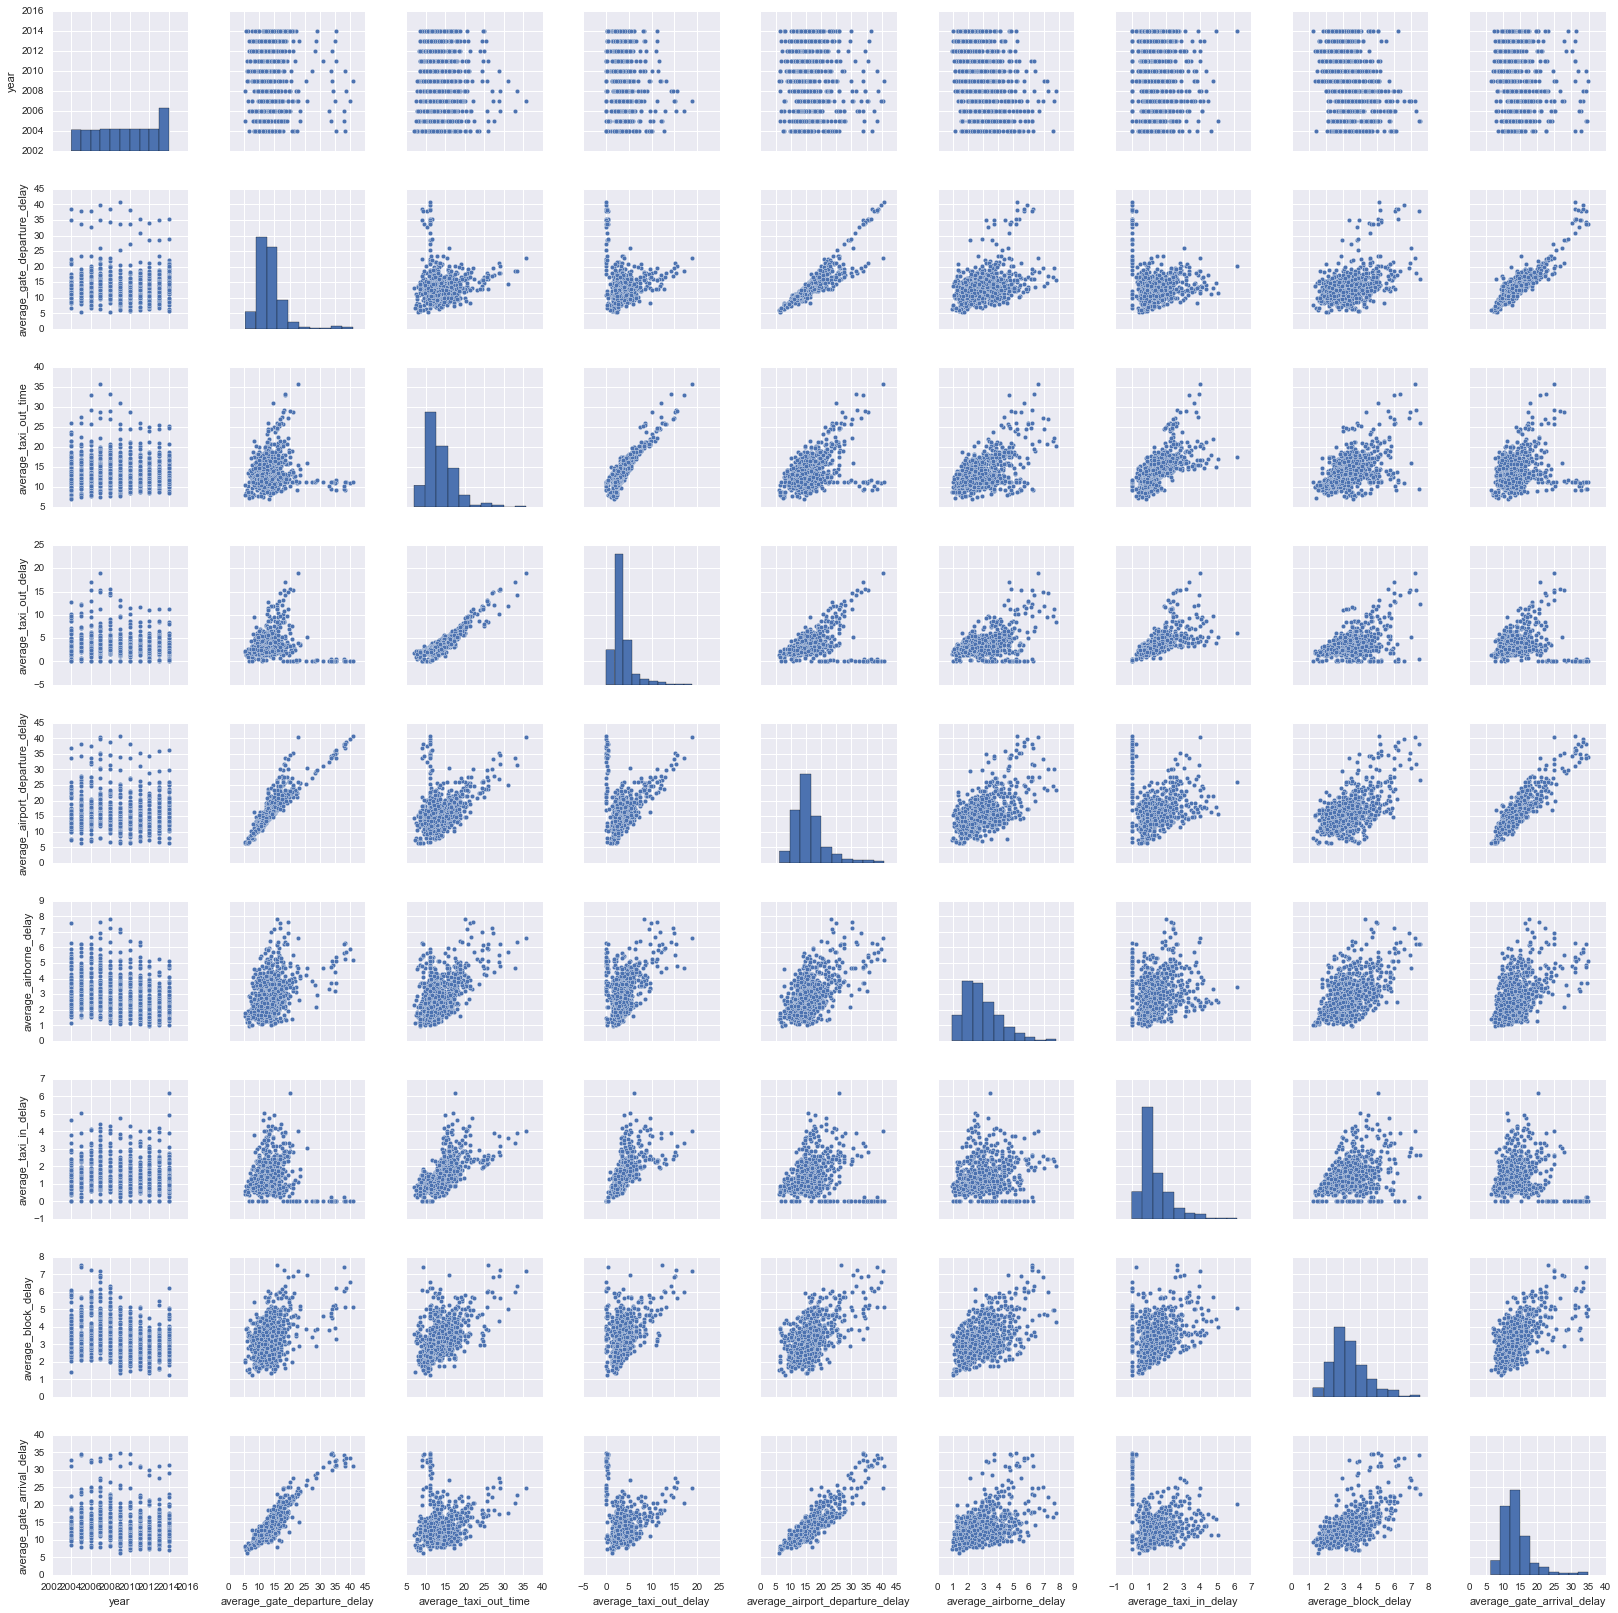

In [431]:
sns.pairplot(ap_ops_avg)

In [158]:
# ap_avg_1 = ap_ops.groupby('airport').agg({'year': 'count', 'departures_for_metric_computation': np.mean, 'arrivals_for_metric_computation': np.mean, 'percent_on-time_gate_departures':np.mean,'percent_on-time_airport_departures':np.mean, 'percent_on-time_gate_arrivals':np.mean})

In [233]:
# ap_avg_1.reset_index(inplace=True)

In [160]:
# ap_avg_2 = ap_cancels.groupby('airport').agg({'year': 'count', 'departure_cancellations': np.mean, 'arrival_diversions':np.mean,'arrival_cancellations':np.mean, 'departure_diversions':np.mean})

In [232]:
# ap_avg_2.reset_index(inplace=True)
# ap_avg_2.head()

airport  departure_diversions  arrival_cancellations  arrival_diversions  \
0     ABQ             73.090909             241.636364           51.818182   
1     ANC             81.545455             340.909091           43.090909   
2     ATL            884.454545            7317.272727          872.181818   
3     AUS             82.090909             430.727273           70.000000   
4     BDL             66.545455             455.363636           37.181818   

   departure_cancellations  year  
0               281.545455    11  
1               277.545455    11  
2              6562.363636    11  
3               474.272727    11  
4               509.363636    11

In [234]:
# ap_avg_2b = ap_avg_2.drop('year',axis=1)
# half_1 = pd.merge(ap_avg_1, ap_avg_2b, on='airport')
# half_1.head()

airport  percent_on-time_gate_arrivals  percent_on-time_airport_departures  \
0     ABQ                       0.786673                            0.775791   
1     ANC                       0.778991                            0.770364   
2     ATL                       0.771736                            0.633418   
3     AUS                       0.751900                            0.769582   
4     BDL                       0.761436                            0.765327   

   percent_on-time_gate_departures  year  departures_for_metric_computation  \
0                         0.801800    11                       44830.454545   
1                         0.796600    11                       67627.545455   
2                         0.771836    11                      469004.000000   
3                         0.793200    11                       53456.000000   
4                         0.807273    11                       45903.090909   

   arrivals_for_metric_computation  departure_diversions  \
0                     44947.272727             73.090909   
1                     63188.454545             81.545455   
2                    465716.909091            884.454545   
3                     53424.363636             82.090909   
4                     45482.000000             66.545455   

   arrival_cancellations  arrival_diversions  departure_cancellations  
0             241.636364           51.818182               281.545455  
1             340.909091           43.090909               277.545455  
2            7317.272727          872.181818              6562.363636  
3             430.727273           70.000000               474.272727  
4             455.363636           37.181818               509.363636

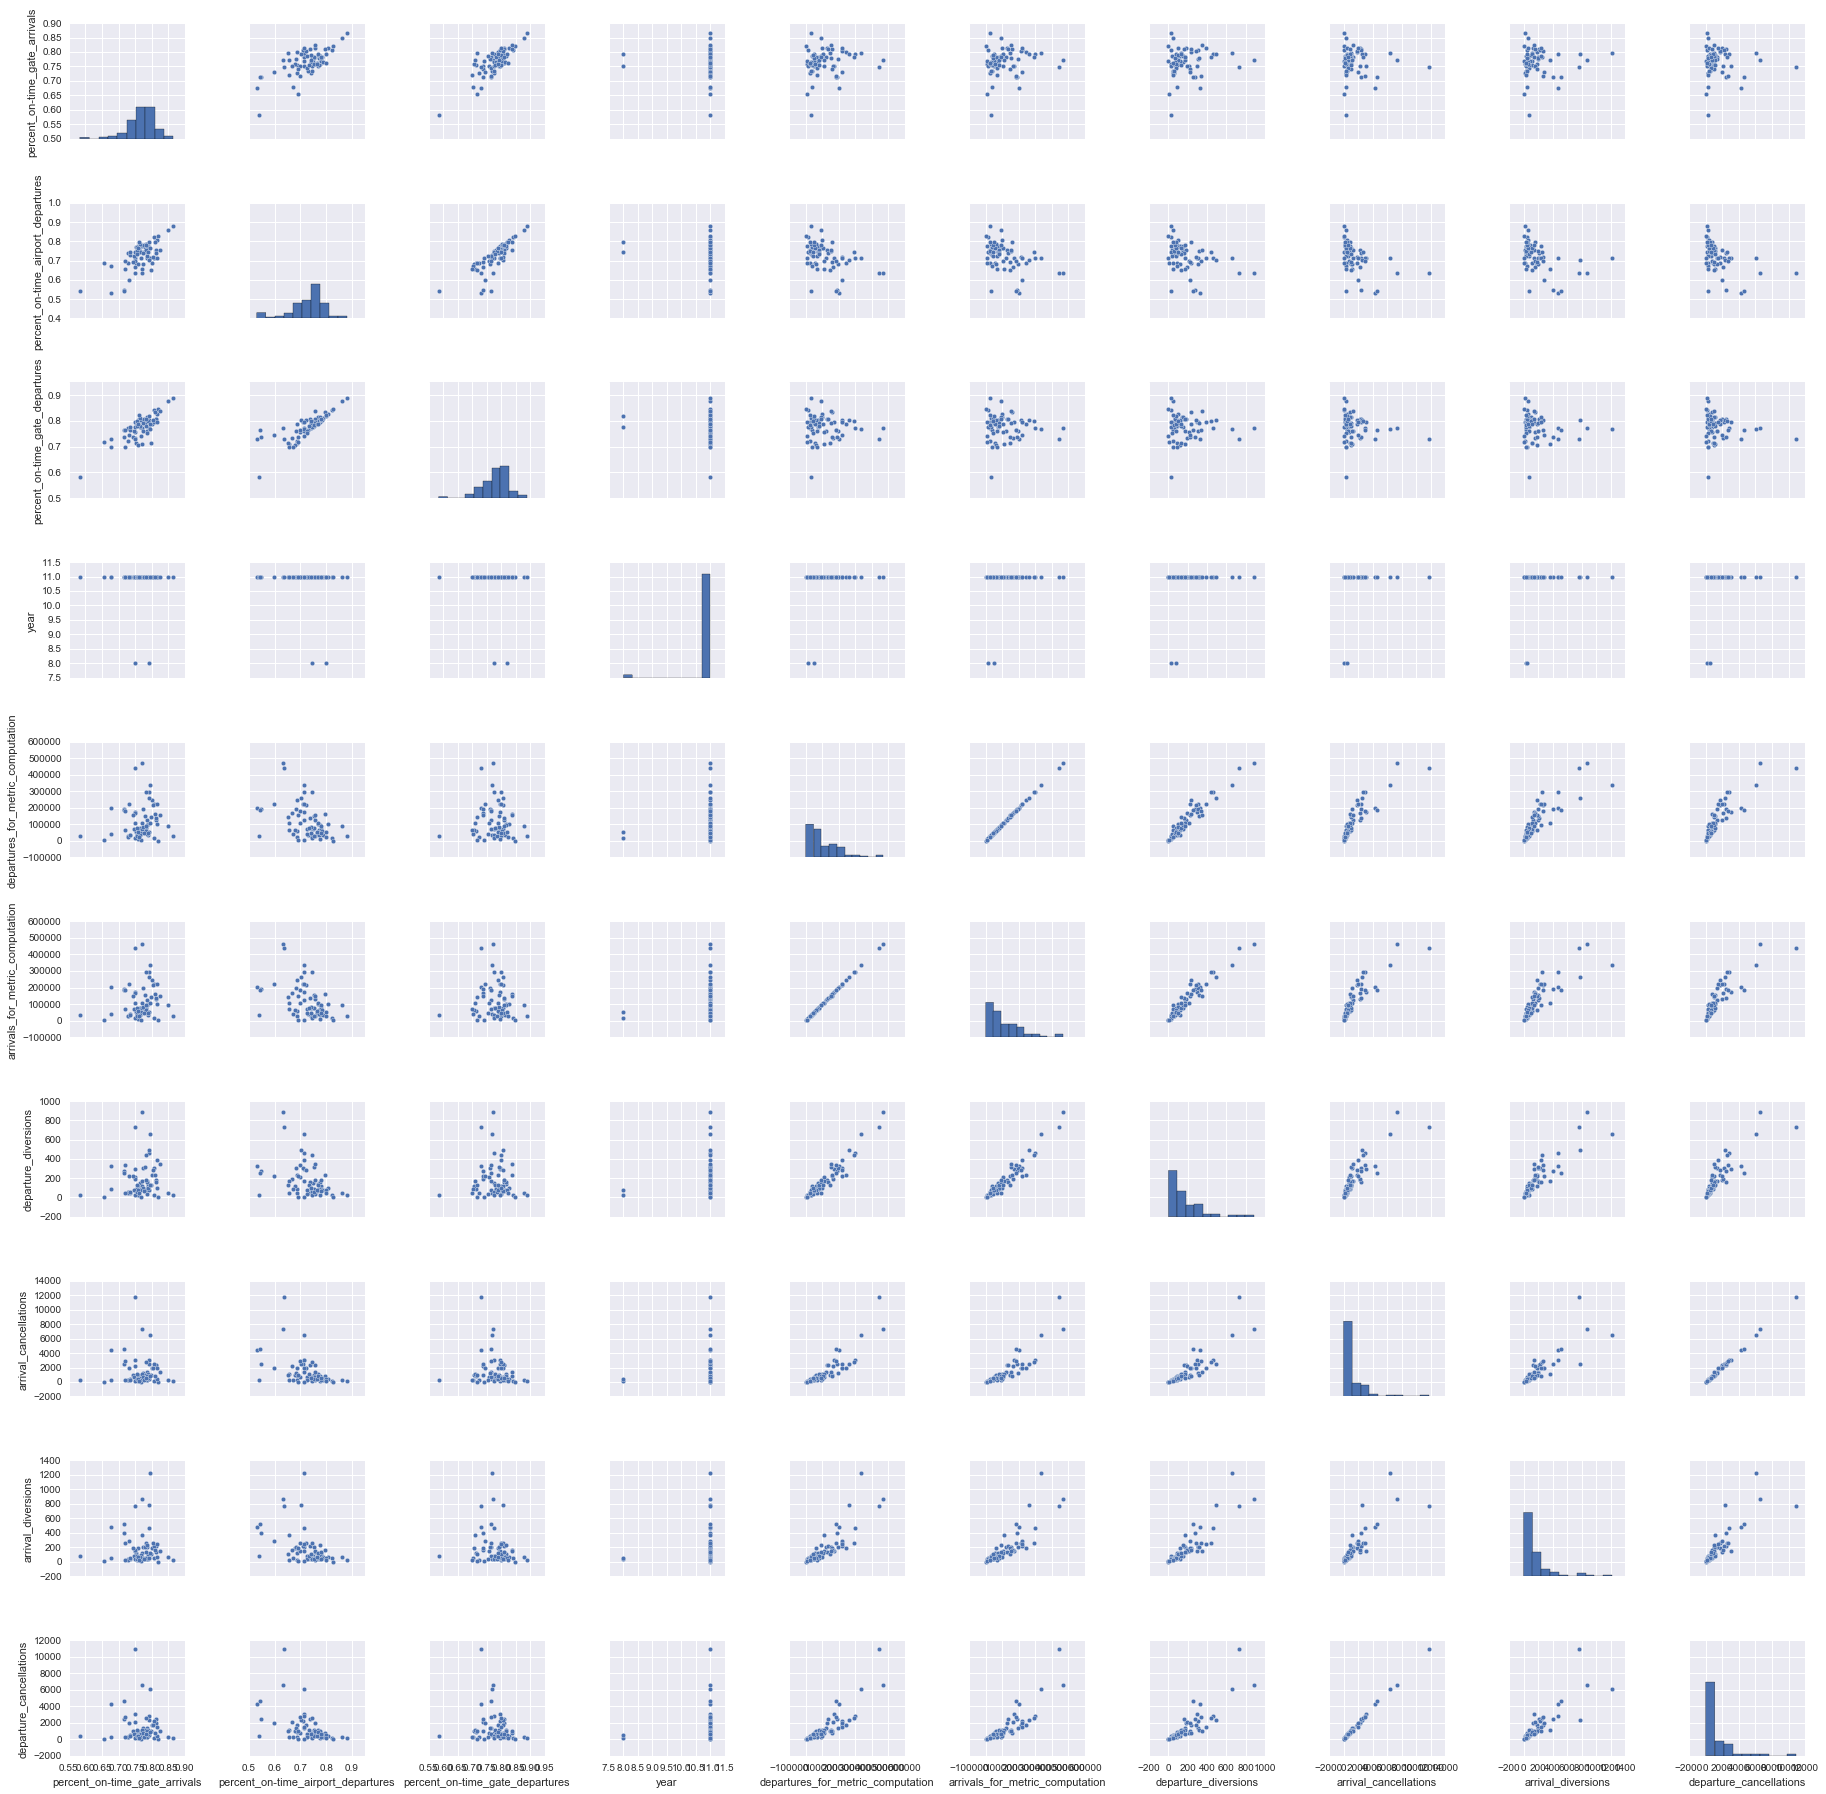

In [433]:
sns.pairplot(half_1)

In [20]:
ap_info.rename(columns={'locid':'airport'},inplace=True)

In [432]:
# half_1b = half_1.drop('year',axis=1)
# avg_ap_allYrs = pd.merge(half_1b, ap_info, on='airport')
# avg_ap_allYrs.head()

In [435]:
# avg_ap_allYrs.info()

In [436]:
# avg_ap_allYrs.describe()

In [246]:
# # -change cats to numerical
# avg_ap_allYrs.airport = pd.Categorical(avg_ap_allYrs.airport)
# avg_ap_allYrs['ap_code'] = avg_ap_allYrs.airport.cat.codes

# avg_ap_allYrs.faa_region = pd.Categorical(avg_ap_allYrs.faa_region)
# avg_ap_allYrs['faa_code'] = avg_ap_allYrs.faa_region.cat.codes

# avg_ap_allYrs.county = pd.Categorical(avg_ap_allYrs.county)
# avg_ap_allYrs['county_code'] = avg_ap_allYrs.county.cat.codes

# avg_ap_allYrs.city = pd.Categorical(avg_ap_allYrs.city)
# avg_ap_allYrs['city_code'] = avg_ap_allYrs.city.cat.codes

# avg_ap_allYrs.state = pd.Categorical(avg_ap_allYrs.state)
# avg_ap_allYrs['state_code'] = avg_ap_allYrs.state.cat.codes

# avg_ap_allYrs.ap_type = pd.Categorical(avg_ap_allYrs.ap_type)
# avg_ap_allYrs['ap_type_code'] = avg_ap_allYrs.ap_type.cat.codes

# avg_ap_allYrs.boundary_data_available = pd.Categorical(avg_ap_allYrs.boundary_data_available)
# avg_ap_allYrs['bound_data_code'] = avg_ap_allYrs.boundary_data_available.cat.codes

In [437]:
# avg_ap_allYrs

In [438]:
# -do describe (all)
# avg_ap_allYrs.describe(include='all')

In [ ]:
# -make sure I'm scaling'
# PCA
# Cluster

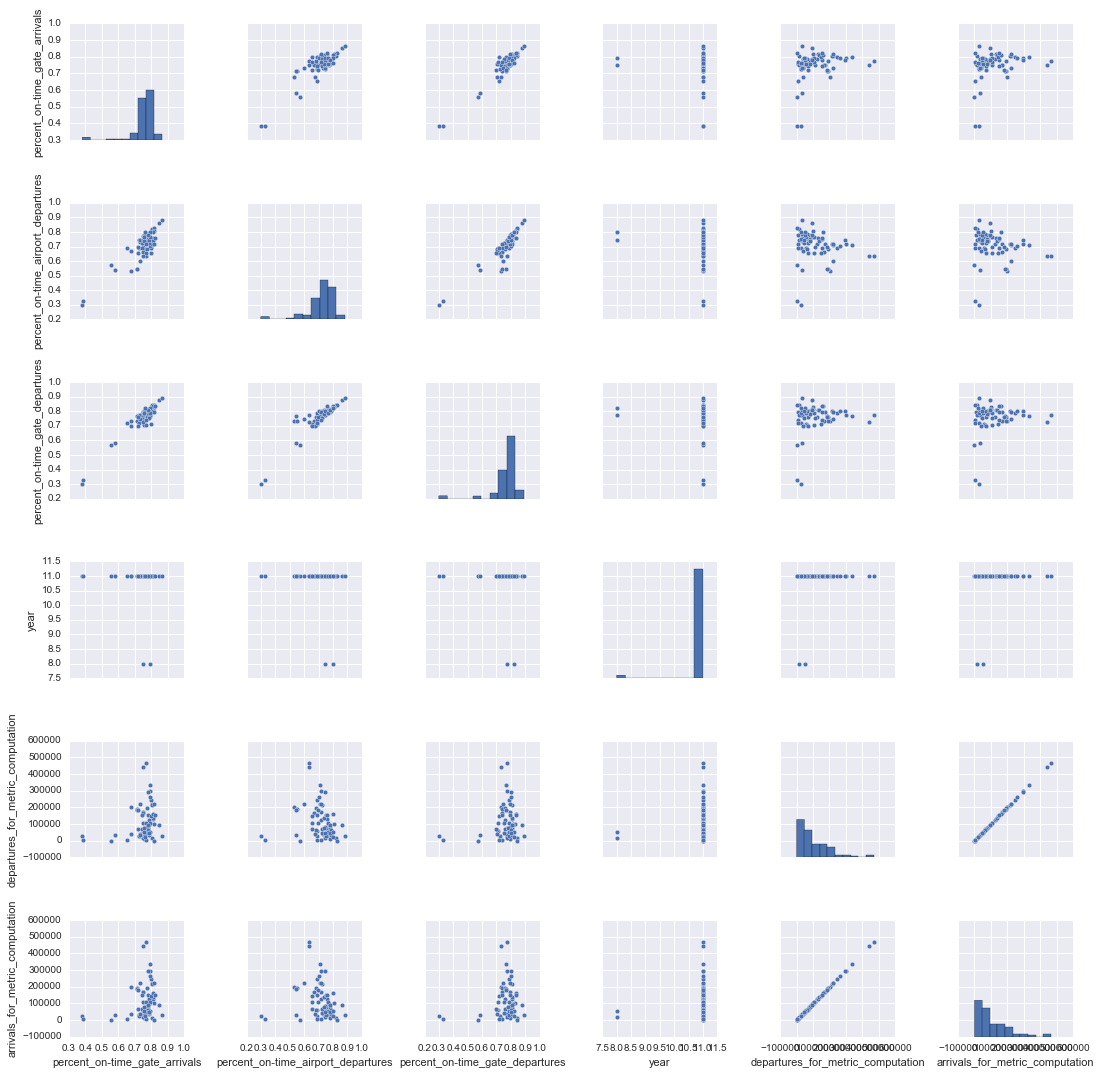

In [162]:
sns.pairplot(ap_avg_1)

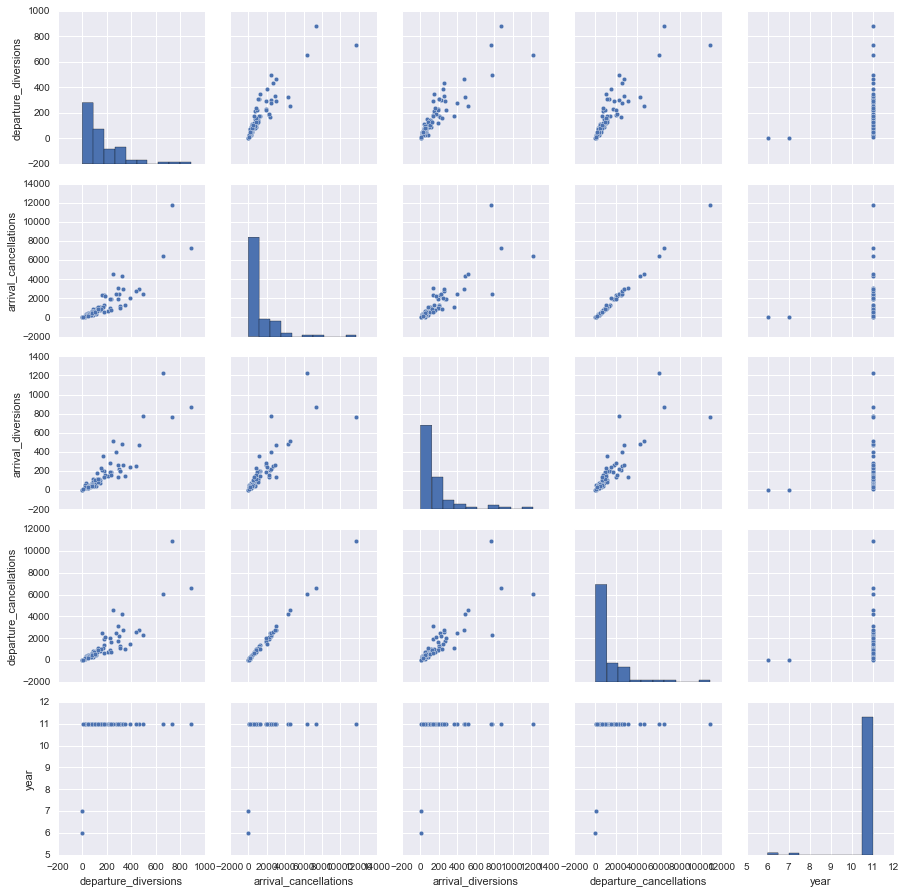

In [173]:
sns.pairplot(ap_avg_2)

# , kind='reg'

#### Are there any unique values? 

In [ ]:
#See SQL Tables

### Part 3: Data Mining

#### 3.1 Create Dummy Variables

#### 3.2 Format and Clean the Data

In [21]:
ap_info.isnull().sum()

key                           3
airport                      15
ap_name                       3
alias                      1669
facility_type                 3
faa_region                    3
county                        3
city                          3
state                         3
ap_type                       3
latitude                      3
longitude                     3
boundary_data_available       3
dtype: int64

In [22]:
# avg_ap_allYrs.isnull().sum()

In [23]:
ap_info.drop(['alias','facility_type'], axis=1, inplace=True)
ap_info.dropna(inplace=True)
ap_info.isnull().sum()

key                        0
airport                    0
ap_name                    0
faa_region                 0
county                     0
city                       0
state                      0
ap_type                    0
latitude                   0
longitude                  0
boundary_data_available    0
dtype: int64

In [24]:
ap_ops.isnull().sum()

airport                               0
year                                  0
departures_for_metric_computation     0
arrivals_for_metric_computation       0
percent_on-time_gate_departures       0
percent_on-time_airport_departures    0
percent_on-time_gate_arrivals         0
average_gate_departure_delay          0
average_taxi_out_time                 0
average_taxi_out_delay                0
average_airport_departure_delay       0
average_airborne_delay                0
average_taxi_in_delay                 0
average_block_delay                   0
average_gate_arrival_delay            0
dtype: int64

In [25]:
ap_cancels.isnull().sum()

airport                    0
year                       0
departure_cancellations    0
arrival_cancellations      0
departure_diversions       0
arrival_diversions         0
dtype: int64

In [26]:
ap_info.dtypes

key                        float64
airport                     object
ap_name                     object
faa_region                  object
county                      object
city                        object
state                       object
ap_type                     object
latitude                   float64
longitude                  float64
boundary_data_available     object
dtype: object

In [445]:
ap_ops.dtypes

airport                                object
year                                    int64
departures_for_metric_computation       int64
arrivals_for_metric_computation         int64
percent_on-time_gate_departures       float64
percent_on-time_airport_departures    float64
percent_on-time_gate_arrivals         float64
average_gate_departure_delay          float64
average_taxi_out_time                 float64
average_taxi_out_delay                float64
average_airport_departure_delay       float64
average_airborne_delay                float64
average_taxi_in_delay                 float64
average_block_delay                   float64
average_gate_arrival_delay            float64
dtype: object

In [446]:
ap_cancels.dtypes

airport                     object
year                       float64
departure_cancellations    float64
arrival_cancellations      float64
departure_diversions       float64
arrival_diversions         float64
dtype: object

### Part 4: Define the Data

In [27]:
# Take a look at airports groupings - are there any relationships by region? Size?

ap_info_reg_size = ap_info[['airport','faa_region','county','state','city']]

ap_region_size = pd.merge(ap_ops, ap_info_reg_size, on='airport', how='left')
ap_region_size.reset_index(inplace=True)

In [51]:
ap_county = ap_region_size.groupby('county').agg({'percent_on-time_airport_departures':np.mean})
ap_region = ap_region_size.groupby('faa_region').agg({'percent_on-time_airport_departures':np.mean})
ap_state = ap_region_size.groupby('state').agg({'percent_on-time_airport_departures':np.mean})
ap_city = ap_region_size.groupby('city').agg({'percent_on-time_airport_departures':np.mean})
ap_airport = ap_region_size.groupby('airport').agg({'percent_on-time_airport_departures':np.mean})


In [28]:
# ap_county = ap_region_size.groupby('county').agg({'airport': 'count', 'departures_for_metric_computation': np.mean, 'arrivals_for_metric_computation': np.mean, 'percent_on-time_gate_departures':np.mean,'percent_on-time_airport_departures':np.mean, 'percent_on-time_gate_arrivals':np.mean})
# ap_region = ap_region_size.groupby('faa_region').agg({'airport': 'count', 'departures_for_metric_computation': np.mean, 'arrivals_for_metric_computation': np.mean, 'percent_on-time_gate_departures':np.mean,'percent_on-time_airport_departures':np.mean, 'percent_on-time_gate_arrivals':np.mean})
# ap_state = ap_region_size.groupby('state').agg({'airport': 'count', 'departures_for_metric_computation': np.mean, 'arrivals_for_metric_computation': np.mean, 'percent_on-time_gate_departures':np.mean,'percent_on-time_airport_departures':np.mean, 'percent_on-time_gate_arrivals':np.mean})
# ap_city = ap_region_size.groupby('city').agg({'airport': 'count', 'departures_for_metric_computation': np.mean, 'arrivals_for_metric_computation': np.mean, 'percent_on-time_gate_departures':np.mean,'percent_on-time_airport_departures':np.mean, 'percent_on-time_gate_arrivals':np.mean})

In [44]:
ap_county.nlargest(10,'percent_on-time_airport_departures')

percent_on-time_airport_departures
county                                         
MAUI                                   0.881027
HONOLULU                               0.859873
VENTURA                                0.827045
MULTNOMAH                              0.808109
SACRAMENTO                             0.798175
PIMA                                   0.797364
KING                                   0.796391
LEE                                    0.787027
SANTA CLARA                            0.783555
#NAME?                                 0.778364

In [46]:
ap_county.nsmallest(10,'percent_on-time_airport_departures')

percent_on-time_airport_departures
county                                          
BERGEN                                  0.298327
ESSEX                                   0.530682
WESTCHESTER                             0.540991
QUEENS                                  0.545418
LAKE                                    0.572836
PHILADELPHIA                            0.598764
FULTON                                  0.633418
COOK                                    0.645055
SHELBY                                  0.653027
LOUDOUN                                 0.665682

In [47]:
# ap_region.nlargest(10, ['percent_on-time_gate_departures','percent_on-time_airport_departures','percent_on-time_gate_arrivals'])

ap_region.nlargest(10,'percent_on-time_airport_departures')

percent_on-time_airport_departures
faa_region                                    
AAL                                   0.770364
ANM                                   0.769223
ACE                                   0.763018
AWP                                   0.746466
ASW                                   0.734444
ANE                                   0.729730
ASO                                   0.721289
AGL                                   0.699795
AEA                                   0.623966

In [48]:
ap_region.nsmallest(10,'percent_on-time_airport_departures')
# ap_region.nsmallest(10, ['percent_on-time_gate_departures','percent_on-time_airport_departures','percent_on-time_gate_arrivals'])

percent_on-time_airport_departures
faa_region                                    
AEA                                   0.623966
AGL                                   0.699795
ASO                                   0.721289
ANE                                   0.729730
ASW                                   0.734444
AWP                                   0.746466
ACE                                   0.763018
ANM                                   0.769223
AAL                                   0.770364

In [49]:
ap_city.nlargest(10,'percent_on-time_airport_departures')
# ap_city.nlargest(10, ['percent_on-time_gate_departures','percent_on-time_airport_departures','percent_on-time_gate_arrivals'])

percent_on-time_airport_departures
city                                          
KAHULUI                               0.881027
HONOLULU                              0.859873
OXNARD                                0.827045
LONG BEACH                            0.821027
PORTLAND                              0.808109
SACRAMENTO                            0.798175
TUCSON                                0.797364
SEATTLE                               0.796391
FORT MYERS                            0.787027
SAN JOSE                              0.783555

In [52]:
ap_city.nsmallest(10,'percent_on-time_airport_departures')
# ap_city.nsmallest(10, ['percent_on-time_gate_departures','percent_on-time_airport_departures','percent_on-time_gate_arrivals'])

percent_on-time_airport_departures
city                                            
TETERBORO                               0.298327
VAN NUYS                                0.324800
NEWARK                                  0.530682
WHITE PLAINS                            0.540991
GARY                                    0.572836
PHILADELPHIA                            0.598764
NEW YORK                                0.622130
ATLANTA                                 0.633418
CHICAGO                                 0.645055
MEMPHIS                                 0.653027

In [194]:
# ap_state.nlargest(10, ['percent_on-time_gate_departures','percent_on-time_airport_departures','percent_on-time_gate_arrivals'])
ap_state.nlargest(10, ['percent_on-time_airport_departures'])

percent_on-time_airport_departures
state                                    
HI                               0.870450
OR                               0.808109
WA                               0.796391
LA                               0.779536
PR                               0.778364
NM                               0.775791
MO                               0.772300
AK                               0.770364
CT                               0.765327
OH                               0.760764

In [195]:
ap_state.nsmallest(10, ['percent_on-time_airport_departures'])

percent_on-time_airport_departures
state                                    
NJ                               0.414505
GA                               0.633418
NY                               0.637427
IN                               0.657582
IL                               0.667976
PA                               0.669950
NV                               0.682182
NH                               0.688382
TN                               0.700177
DC                               0.701405

In [53]:
ap_airport.nlargest(10, ['percent_on-time_airport_departures'])

percent_on-time_airport_departures
airport                                    
OGG                                0.881027
HNL                                0.859873
OXR                                0.827045
LGB                                0.821027
PDX                                0.808109
SMF                                0.798175
TUS                                0.797364
SEA                                0.796391
RSW                                0.787027
SJC                                0.783555

In [54]:
ap_airport.nsmallest(10, ['percent_on-time_airport_departures'])

percent_on-time_airport_departures
airport                                    
TEB                                0.298327
VNY                                0.324800
EWR                                0.530682
HPN                                0.540991
LGA                                0.543236
JFK                                0.547600
GYY                                0.572836
PHL                                0.598764
ATL                                0.633418
ORD                                0.634727

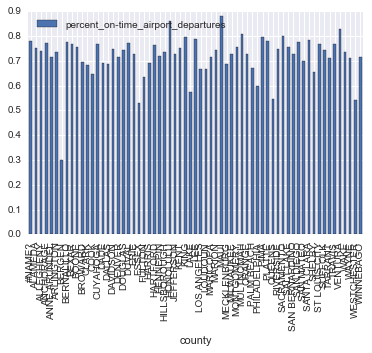

In [55]:
ap_county.plot(kind='bar')

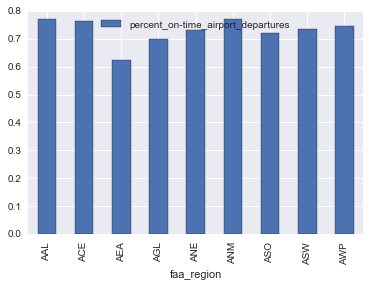

In [56]:
ap_region.plot(kind='bar')

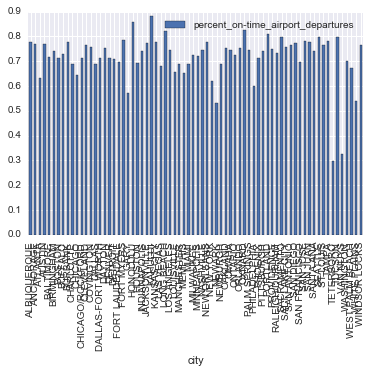

In [57]:
ap_city.plot(kind='bar')


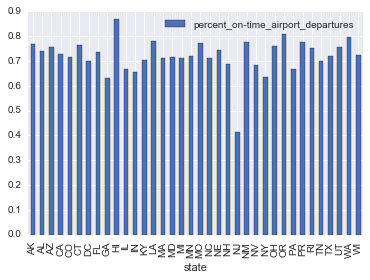

In [58]:
ap_state.plot(kind='bar')

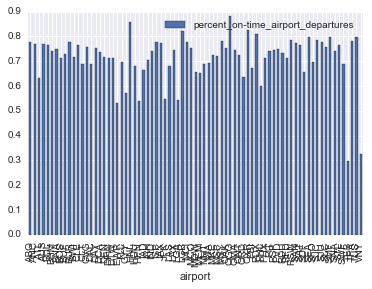

In [60]:
ap_airport.plot(kind='bar')

#### 4.1 Confirm that the dataset has a normal distribution. How can you tell? 

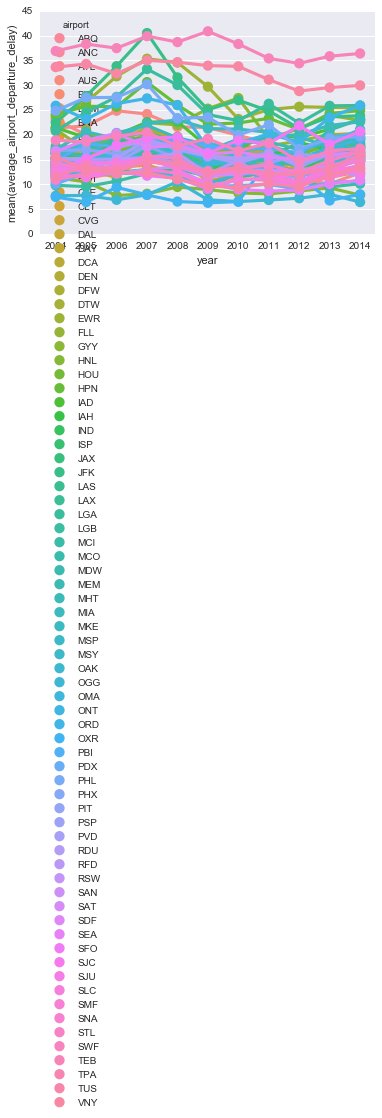

In [61]:
sns.pointplot(x="year", y="average_airport_departure_delay", hue="airport", data=ap_ops)

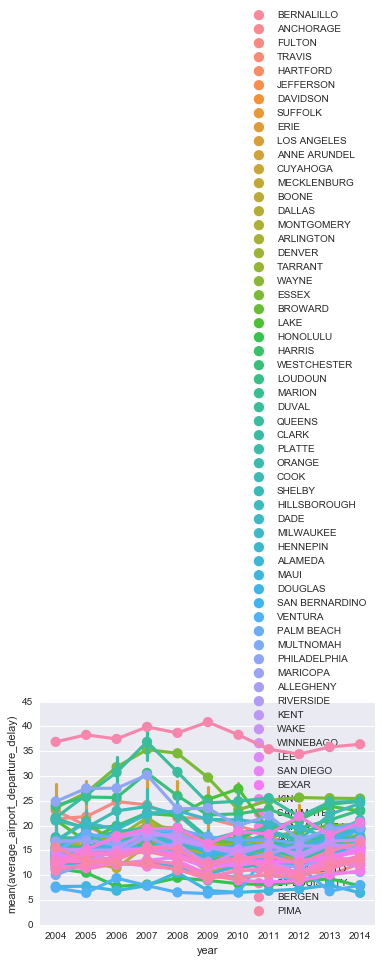

In [76]:
sns.pointplot(x="year", y="average_airport_departure_delay", hue="county", data=ap_region_size, legend=False)
plt.legend(loc='lower right')


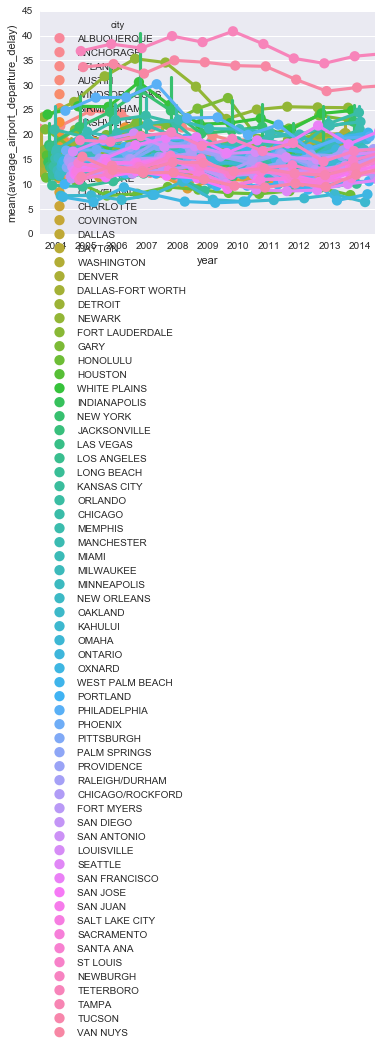

In [63]:
sns.pointplot(x="year", y="average_airport_departure_delay", hue="city", data=ap_region_size, dodge=True)

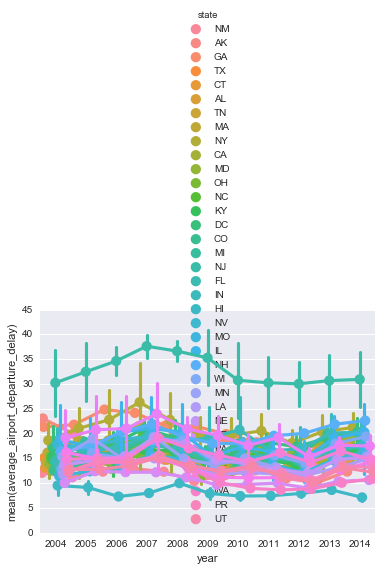

In [64]:
sns.pointplot(x="year", y="average_airport_departure_delay", hue="state", data=ap_region_size, dodge=True)

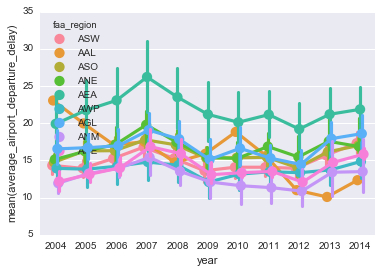

In [65]:
sns.pointplot(x="year", y="average_airport_departure_delay", hue="faa_region", data=ap_region_size, dodge=True)

#### 4.2 Find correlations in the data

#### 4.3 What is the value of understanding correlations before PCA? 

Answer: 

#### 4.4 Validate your findings using statistical analysis

#### 4.5 How can you improve your overall analysis? 

Answer: 

### Part 5: Perform a PCA

#### 5.1 Conduct the PCA

In [77]:
# avg_ap_allYrs_num = avg_ap_allYrs.drop(['ap_name','faa_region', 'county','city','state','ap_type','boundary_data_available'], axis=1)
# avg_ap_allYrs_num.columns

In [78]:
# avg_ap_allYrs_num.dtypes

In [79]:
ap_ops.columns

Index([u'airport', u'year', u'departures_for_metric_computation',
       u'arrivals_for_metric_computation', u'percent_on-time_gate_departures',
       u'percent_on-time_airport_departures', u'percent_on-time_gate_arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average_taxi_out_delay', u'average_airport_departure_delay',
       u'average_airborne_delay', u'average_taxi_in_delay',
       u'average_block_delay', u'average_gate_arrival_delay'],
      dtype='object')

In [80]:
# -change cats to numerical
ap_ops.airport = pd.Categorical(ap_ops.airport)
ap_ops['ap_code'] = ap_ops.airport.cat.codes

In [ ]:
#from 3.2 PCA Lab1

In [156]:
# First, let's define the x and y variables: Airport is going to be our target variable.
demo = ap_ops.drop(['airport','year','arrivals_for_metric_computation','departures_for_metric_computation'],axis=1)
x = ap_ops.drop(['airport','average_airport_departure_delay','year','arrivals_for_metric_computation','departures_for_metric_computation'],axis=1)
x - (x.mean()) / x.std()
y = ap_ops['average_airport_departure_delay']

In [157]:
# Then, standardize the x variable for analysis

# xStand = StandardScaler().fit_transform(x)

In [158]:
x_corr = np.corrcoef(x.values.T)
x.corr()

percent_on-time_gate_departures  \
percent_on-time_gate_departures                            1.000000   
percent_on-time_airport_departures                         0.896319   
percent_on-time_gate_arrivals                              0.920834   
average_gate_departure_delay                              -0.960398   
average_taxi_out_time                                      0.034791   
average_taxi_out_delay                                     0.112712   
average_airborne_delay                                    -0.352806   
average_taxi_in_delay                                      0.156025   
average_block_delay                                       -0.402450   
average_gate_arrival_delay                                -0.860146   
ap_code                                                   -0.160884   

                                    percent_on-time_airport_departures  \
percent_on-time_gate_departures                               0.896319   
percent_on-time_airport_departures                            1.000000   
percent_on-time_gate_arrivals                                 0.842921   
average_gate_departure_delay                                 -0.906287   
average_taxi_out_time                                        -0.370999   
average_taxi_out_delay                                       -0.331784   
average_airborne_delay                                       -0.564241   
average_taxi_in_delay                                        -0.155152   
average_block_delay                                          -0.574753   
average_gate_arrival_delay                                   -0.864986   
ap_code                                                      -0.068122   

                                    percent_on-time_gate_arrivals  \
percent_on-time_gate_departures                          0.920834   
percent_on-time_airport_departures                       0.842921   
percent_on-time_gate_arrivals                            1.000000   
average_gate_departure_delay                            -0.913605   
average_taxi_out_time                                   -0.017341   
average_taxi_out_delay                                   0.050570   
average_airborne_delay                                  -0.362817   
average_taxi_in_delay                                    0.181027   
average_block_delay                                     -0.525587   
average_gate_arrival_delay                              -0.954857   
ap_code                                                 -0.175158   

                                    average_gate_departure_delay  \
percent_on-time_gate_departures                        -0.960398   
percent_on-time_airport_departures                     -0.906287   
percent_on-time_gate_arrivals                          -0.913605   
average_gate_departure_delay                            1.000000   
average_taxi_out_time                                   0.094702   
average_taxi_out_delay                                  0.002276   
average_airborne_delay                                  0.405513   
average_taxi_in_delay                                  -0.067174   
average_block_delay                                     0.477748   
average_gate_arrival_delay                              0.916972   
ap_code                                                 0.098455   

                                    average_taxi_out_time  \
percent_on-time_gate_departures                  0.034791   
percent_on-time_airport_departures              -0.370999   
percent_on-time_gate_arrivals                   -0.017341   
average_gate_departure_delay                     0.094702   
average_taxi_out_time                            1.000000   
average_taxi_out_delay                           0.915922   
average_airborne_delay                           0.540622   
average_taxi_in_delay                            0.685059   
average_block_delay                              0.521179   
average_gate_arrival_delay            

In [159]:
eig_vals, eig_vecs = np.linalg.eig(x_corr)
print eig_vals
print eig_vecs

[  5.39524082e+00   3.05292660e+00   9.26474031e-01   5.93253922e-01
   4.61654178e-01   3.01770794e-01   2.62724834e-03   1.01462113e-02
   4.48474031e-02   1.19100740e-01   9.19580529e-02]
[[ -3.74080740e-01   2.47006789e-01   7.06999852e-02   1.21876258e-01
    1.86795913e-01  -1.91916545e-01  -7.20387468e-01   1.24777973e-01
    2.33279954e-01   3.44187097e-01   7.89437651e-03]
 [ -4.13651399e-01   1.10532350e-02   2.43952780e-02   1.05988924e-01
    3.03045067e-01  -1.99862080e-02   6.14238152e-01   3.30369913e-01
    1.56710700e-01   3.77851612e-01   2.66351145e-01]
 [ -3.84400289e-01   2.24359634e-01   1.85704570e-02   5.07203543e-02
   -1.03733610e-01   1.64264757e-01   1.10504533e-01  -5.63293361e-01
    5.15779574e-01  -3.70626079e-01   1.68330815e-01]
 [  3.93439265e-01  -1.81562240e-01  -9.75386626e-02  -1.42953939e-01
   -1.40649961e-01   7.27471020e-02  -1.12605606e-01   4.38304219e-01
    6.60245866e-01  -1.04073289e-01   3.25069318e-01]
 [  1.69003015e-01   4.88971002e-

In [160]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print cum_var_exp

[  49.04764382   76.80152199   85.22401319   90.61723066   94.81408683
   97.55745768   98.64019168   99.47617397   99.88387764   99.97611592
  100.        ]


ValueError: x and y must have same first dimension

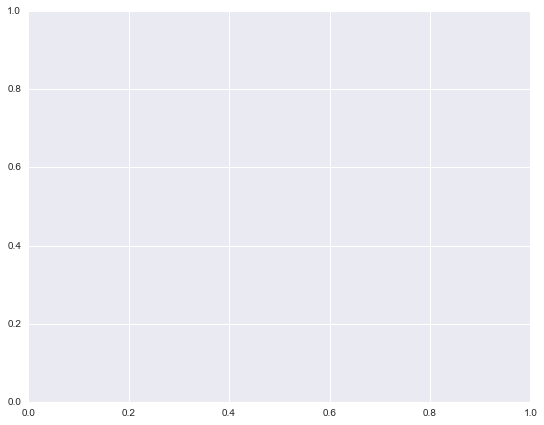

In [161]:
plt.figure(figsize=(9,7))

component_number = [1,2,3]

plt.plot(component_number, cum_var_exp, lw=7)

plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')


ax = plt.gca()
ax.set_xlim([1,3])
ax.set_ylim([-5,105])

ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('component vs cumulative variance explained\n', fontsize=20)

plt.show()

In [162]:
value_vector_pairs = [[eig_vals[i], eig_vecs[:,i]] for i in range(len(eig_vals))]
value_vector_pairs.sort(reverse=True)

In [163]:
weight_2d_projection = np.hstack((value_vector_pairs[0][1].reshape(eig_vecs.shape[1],1),
                                  value_vector_pairs[1][1].reshape(eig_vecs.shape[1],1)))

print 'Weight data 2d PCA projection matrix:\n', weight_2d_projection

Weight data 2d PCA projection matrix:
[[-0.37408074  0.24700679]
 [-0.4136514   0.01105323]
 [-0.38440029  0.22435963]
 [ 0.39343926 -0.18156224]
 [ 0.16900301  0.488971  ]
 [ 0.13893283  0.50679578]
 [ 0.27219149  0.23066661]
 [ 0.06563531  0.46384266]
 [ 0.30929449  0.19673034]
 [ 0.40432291 -0.11425885]
 [ 0.03158223 -0.1987807 ]]


In [164]:
Z = x.dot(weight_2d_projection)


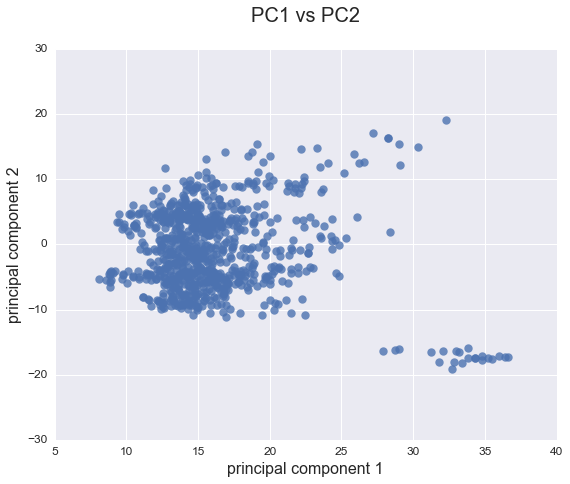

In [165]:
fig = plt.figure(figsize=(9,7))

ax = fig.gca()
ax = sns.regplot(Z.iloc[:,0], Z.iloc[:,1],
                 fit_reg=False, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('principal component 2', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs PC2\n', fontsize=20)

plt.show()


In [166]:
ap_ops_pcs = demo.copy()

ap_ops_pcs = (demo - demo.mean()) / demo.std()

ap_ops_pcs['PC1'] = Z.iloc[:,0]
ap_ops_pcs['PC2'] = Z.iloc[:,1]

In [167]:
ap_ops_pcs = pd.melt(ap_ops_pcs, id_vars=['PC1','PC2'])


In [168]:
ap_ops_pcs.head()


PC1       PC2                         variable     value
0  11.072815  4.779612  percent_on-time_gate_departures  0.416462
1  10.347541  4.818386  percent_on-time_gate_departures  0.534284
2  11.553203  4.393419  percent_on-time_gate_departures  0.366119
3  12.376934  4.853526  percent_on-time_gate_departures  0.389684
4  11.476610  4.872770  percent_on-time_gate_departures  0.494653

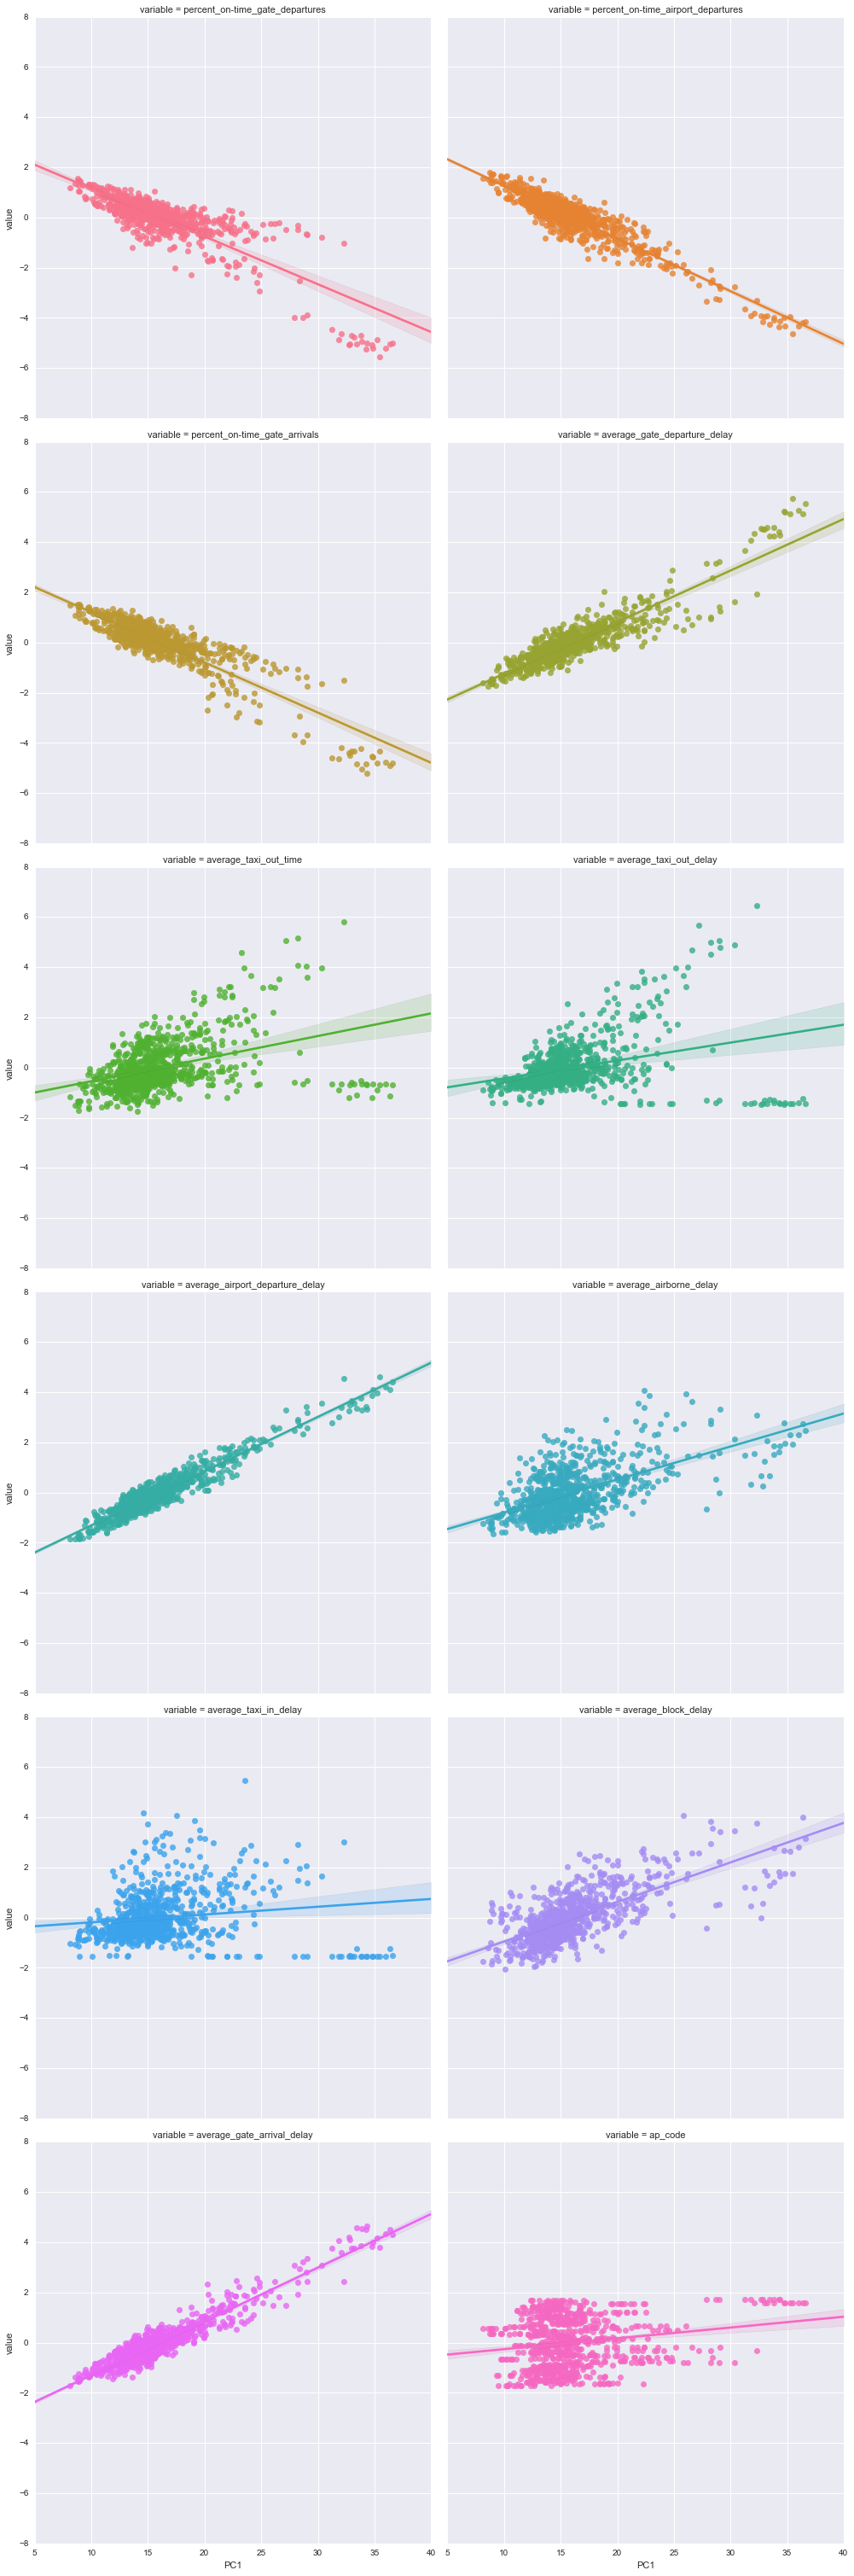

In [169]:
pc1 = sns.lmplot(x="PC1", y="value", col="variable", hue="variable", 
                 data=ap_ops_pcs, col_wrap=2, size=7, scatter_kws={'s':50})

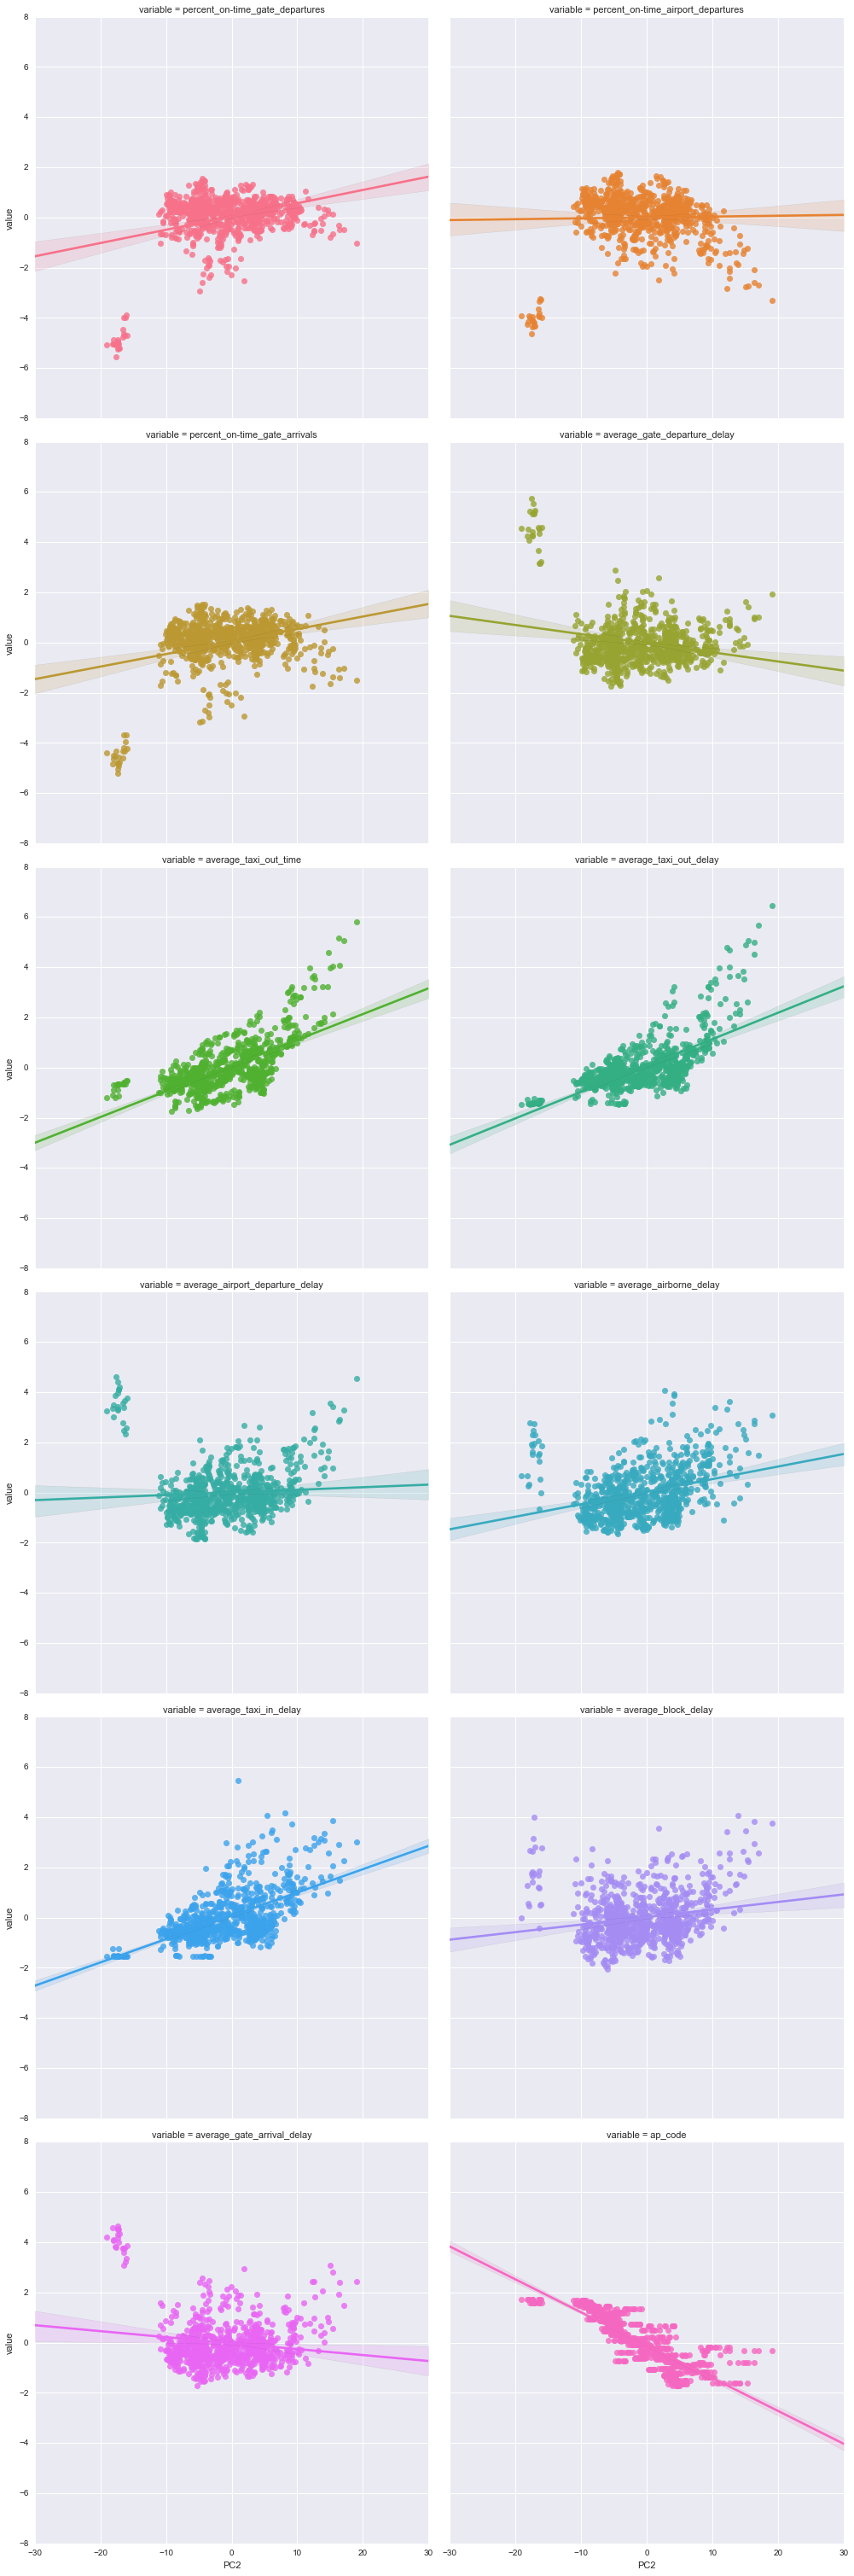

In [170]:
pc2 = sns.lmplot(x="PC2", y="value", col="variable", hue="variable", 
                 data=ap_ops_pcs, col_wrap=2, size=7, scatter_kws={'s':50})

In [83]:
# # Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

# covMat = np.cov(xStand.T)
# eigenValues, eigenVectors = np.linalg.eig(covMat)

In [84]:
# Then, check your eigenvalues and eigenvectors:

# print(eigenValues)
# print(eigenVectors)

[  5.52729327e+00   4.37905579e+00   1.20095470e+00   9.30806407e-01
   7.33012844e-01   4.99831061e-01   3.35017525e-01   1.65583747e-01
   1.17332159e-01   7.23185649e-02   4.42242503e-02   8.88802802e-03
   2.18360826e-03   1.64713567e-04]
[[ -7.51298273e-02   4.35984069e-02   8.09517958e-01  -2.04238827e-03
   -4.12059345e-01  -4.69595245e-02  -3.75997937e-01  -4.13837662e-02
    1.18183720e-02  -1.37252193e-01  -3.57619039e-02   3.21149121e-02
   -2.74281847e-02   2.36659130e-03]
 [  1.51811319e-01  -3.96411109e-01   1.77964639e-01  -8.42221233e-02
    3.93843200e-01  -1.31757849e-01  -1.06726632e-01   2.88972077e-01
   -6.01057717e-02  -8.33344602e-02   1.92561427e-03   2.09527486e-02
    2.29121905e-02   7.08628051e-01]
 [  1.51318216e-01  -3.96087065e-01   1.79188829e-01  -8.53567705e-02
    3.95099495e-01  -1.34729909e-01  -1.03978853e-01   2.89673213e-01
   -6.51770054e-02  -9.64271329e-02  -2.85024631e-03   3.38945605e-02
   -2.87349664e-02  -7.04497403e-01]
 [ -3.21905599e-

In [85]:
# # To find the principal componants, find the eigenpairs, and sort them from highest to lowest.

# eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
# eigenPairs.sort()
# eigenPairs.reverse()
# for i in eigenPairs:
#     print(i[0])

5.52729326742
4.3790557908
1.20095470081
0.930806407369
0.73301284357
0.4998310614
0.335017524569
0.165583746846
0.117332158861
0.0723185648897
0.0442242502839
0.00888802802477
0.00218360825943
0.000164713567012


In [86]:
# #Next, Calculate the explained variance

# totalEigen = sum(eigenValues)
# varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]
# cumulvarExpl = np.cumsum(varExpl)

In [87]:
# print(varExpl)
# print(cumulvarExpl)

[39.433721289553944, 31.241777342200223, 8.5680478060020455, 6.6407115864621309, 5.229580334628035, 3.5659766568377353, 2.3901369172610485, 1.1813346980688584, 0.83709031292329916, 0.51594695521770007, 0.31551189263180407, 0.063410425860433606, 0.015578655834229285, 0.0011751265185151638]
[  39.43372129   70.67549863   79.24354644   85.88425802   91.11383836
   94.67981502   97.06995193   98.25128663   99.08837694   99.6043239
   99.91983579   99.98324622   99.99882487  100.        ]


In [171]:
# plt.figure(figsize=(9,7))

# component_number = [1,2,3]

# plt.plot(component_number, cumulvarExpl, lw=7)

# plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
# plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')


# ax = plt.gca()
# ax.set_xlim([1,3])
# ax.set_ylim([-5,105])

# ax.set_ylabel('cumulative variance explained', fontsize=16)
# ax.set_xlabel('component', fontsize=16)

# for tick in ax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(12) 
    
# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(12) 
    
# ax.set_title('component vs cumulative variance explained\n', fontsize=20)

# plt.show()

In [93]:
# value_vector_pairs = [[eigenValues[i], eigenVectors[:,i]] for i in range(len(eigenValues))]
# value_vector_pairs.sort(reverse=True)

In [94]:
# weight_2d_projection = np.hstack((value_vector_pairs[0][1].reshape(eigenVectors.shape[1],1),
#                                   value_vector_pairs[1][1].reshape(eigenVectors.shape[1],1)))

# print 'Weight data 2d PCA projection matrix:\n', weight_2d_projection

Weight data 2d PCA projection matrix:
[[ -7.51298273e-02   4.35984069e-02]
 [  1.51811319e-01  -3.96411109e-01]
 [  1.51318216e-01  -3.96087065e-01]
 [ -3.21905599e-01  -2.77502383e-01]
 [ -3.96714907e-01  -1.09737199e-01]
 [ -3.29625584e-01  -2.85090531e-01]
 [  3.49114034e-01   2.36687567e-01]
 [  2.39449250e-01  -3.29854737e-01]
 [  2.13089146e-01  -3.46099630e-01]
 [  2.98940765e-01  -9.88922391e-02]
 [  1.50912876e-01  -3.86755049e-01]
 [  3.28331660e-01  -6.15530122e-02]
 [  3.66315679e-01   2.04158435e-01]
 [  5.47374468e-05   1.55908061e-01]]


In [95]:
# Z = xStand.dot(weight_2d_projection)

In [172]:
# fig = plt.figure(figsize=(9,7))

# ax = fig.gca()
# ax = sns.regplot(Z[:,0], Z[:,1],
#                  fit_reg=False, scatter_kws={'s':70}, ax=ax)

# ax.set_xlabel('principal component 1', fontsize=16)
# ax.set_ylabel('principal component 2', fontsize=16)


# for tick in ax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(12) 
    
# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(12) 
    
# ax.set_title('PC1 vs PC2\n', fontsize=20)

# plt.show()

In [103]:
ap_ops_pcs = demo.copy()

ap_ops_pcs = (demo - demo.mean()) / demo.std()

ap_ops_pcs['PC1'] = Z[:,0]
ap_ops_pcs['PC2'] = Z[:,1]

In [173]:
# ap_ops_pcs = pd.melt(ap_ops_pcs, id_vars=['PC1','PC2'])
# ap_ops_pcs.head()

In [174]:
# pc1 = sns.lmplot(x="PC1", y="value", col="variable", hue="variable", 
#                  data=ap_ops_pcs, col_wrap=2, size=7, scatter_kws={'s':50})

In [89]:
# sns.pointplot(x="year", y="average_gate_departure_delay", hue="airport", data=ap_ops)
# sns.pointplot(x="year", y="average_gate_departure_delay", hue="county", data=ap_region_size)
# sns.pointplot(x="year", y="average_gate_departure_delay", hue="city", data=ap_region_size, dodge=True)
# sns.pointplot(x="year", y="average_gate_departure_delay", hue="state", data=ap_region_size, dodge=True)
# sns.pointplot(x="year", y="average_gate_departure_delay", hue="faa_region", data=ap_region_size, dodge=True)

In [349]:
#--------------------

In [350]:
# 4.1 pca Lab 2

In [351]:
# What does the explained variance tell us?: Here, we can see that 79.24% of the behavior can be explained by the first three principal componants

In [175]:
# pcask = PCA(n_components=3)
# print pcask.fit(xStand).components_ # See the eigenvectors
# xPC = pcask.fit_transform(xStand) # Use the eigenvectors to transform xStand onto new axes

In [177]:

# ap_ops_x = (x - x.mean()) / x.std()

# ap_ops_corr = np.corrcoef(ap_ops_x.values.T)
# ap_ops.corr()

# eig_vals, eig_vecs = np.linalg.eig(ap_ops_corr)
# print eig_vals
# print eig_vecs

# value_vector_pairs = [[eig_vals[i], eig_vecs[:,i]] for i in range(len(eig_vals))]
# value_vector_pairs.sort(reverse=True)

# weight_2d_projection = np.hstack((value_vector_pairs[0][1].reshape(eig_vecs.shape[1],1),
#                                   value_vector_pairs[1][1].reshape(eig_vecs.shape[1],1)))

# print 'Weight data 2d PCA projection matrix:\n', weight_2d_projection


# Z = ap_ops_x.dot(weight_2d_projection)

# ap_ops_pcs = ap_ops.copy()

# ap_ops_pcs = (ap_ops - ap_ops.mean()) / ap_ops.std()

# ap_ops_pcs['PC1'] = Z.iloc[:,0]
# ap_ops_pcs['PC2'] = Z.iloc[:,1]


# ap_ops_melt = pd.melt(ap_ops_pcs, id_vars=['PC1','PC2'])

# ap_ops_melt.head()


In [ ]:
# pc1 = sns.lmplot(x="PC1", y="value", col="variable", hue="variable", 
#                  data=demo_pcs, col_wrap=2, size=7, scatter_kws={'s':50})

In [398]:
# PCdf = pd.DataFrame(xPC, columns=['PC1','PC2','PC3'])
# 

In [399]:
# ap_ops2 = ap_ops[['airport', 'year']]


In [404]:
# ap_ops_pca = ap_ops2.join(PCdf, on=None, how='left')

# melted_df = pd.melt(ap_ops_pca, id_vars=['PC1','PC2','PC3'])


In [ ]:
# eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
# eigenPairs.sort()
# eigenPairs.reverse()
# for i in eigenPairs:
#     print(i[0])


# value_vector_pairs = [[eig_vals[i], eig_vecs[:,i]] for i in range(len(eig_vals))]
# value_vector_pairs.sort(reverse=True)

# demo_pcs = demo.copy()

# demo_pcs = (demo - demo.mean()) / demo.std()

# demo_pcs['PC1'] = Z.iloc[:,0]
# demo_pcs['PC2'] = Z.iloc[:,1]

In [180]:
# melted_df.head()


In [181]:
# pc1 = sns.lmplot(x="PC1", y="value", col="variable", hue="variable", 
#                  data=melted_df, col_wrap=2, size=7, scatter_kws={'s':50})

In [182]:
# pc1 = sns.lmplot(x="PC1", y="value", col="variable", hue="variable", 
#                  data=melted_df, col_wrap=2, size=7, scatter_kws={'s':50})

In [183]:
# graph = ap_ops_pcs.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

# for i, airport in enumerate(ap_ops['airport']):
#     graph.annotate(airport, (ap_ops_pcs.iloc[i].PC2, ap_ops_pcs.iloc[i].PC1))

In [189]:
#IN THIS SAME LAB: CLUSTER WITH KMEANS

X = x.as_matrix(columns=None)


k = 3
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit(X)


In [190]:

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [191]:

print(labels)
print(centroids)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [192]:
metrics.accuracy_score(y, labels)

ValueError: Can't handle mix of continuous and multiclass

In [193]:
print(metrics.classification_report(y, labels))
print(metrics.confusion_matrix(y, labels))


ValueError: Mix type of y not allowed, got types set(['continuous', 'multiclass'])

In [359]:
metrics.silhouette_score(xStand, labels, metric='euclidean')


0.39041869222388953

In [360]:
ap_ops_pca['cluster'] = pd.Series(clusters.labels_)


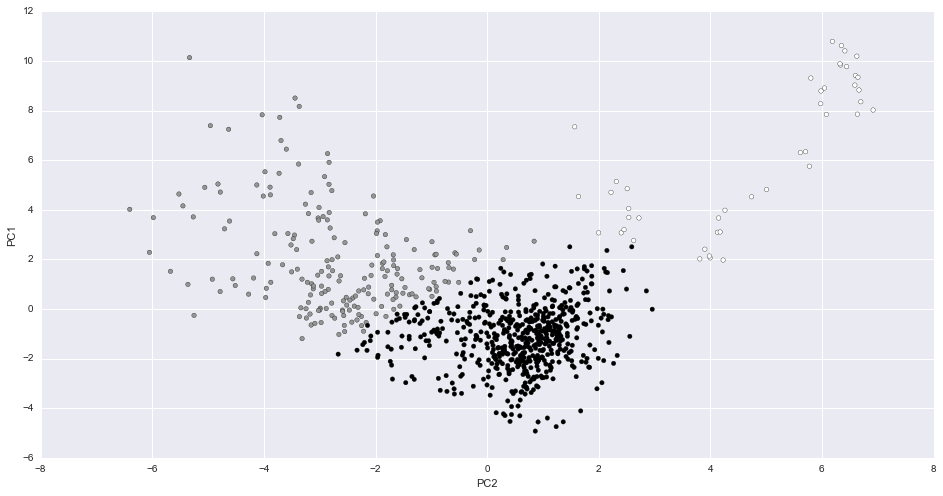

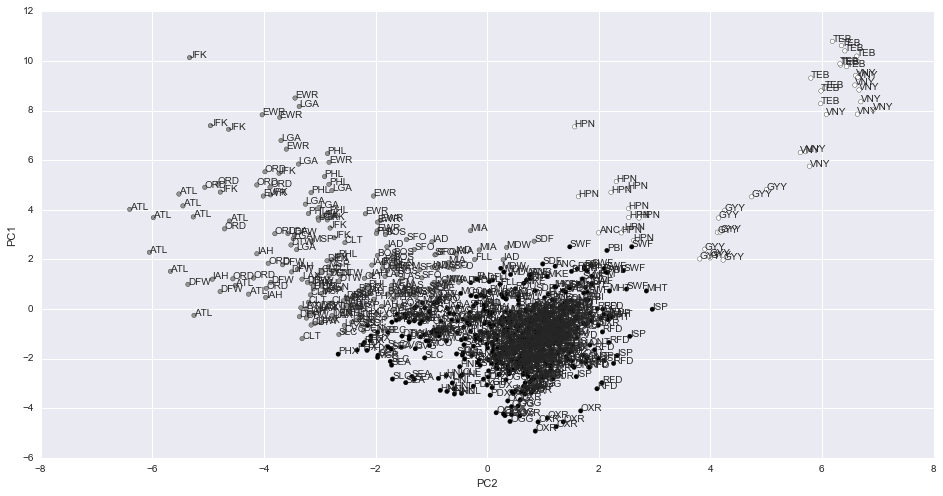

In [361]:
graph = ap_ops_pca.plot(
    kind='scatter',
    x='PC2',y='PC1',
    c=ap_ops_pca.cluster.astype(np.float), 
    figsize=(16,8))

graph2 = ap_ops_pca.plot(
    kind='scatter',
    x='PC2',y='PC1',
    c=ap_ops_pca.cluster.astype(np.float), 
    figsize=(16,8))

for i, airport in enumerate(ap_ops['airport']):
    graph2.annotate(airport, (ap_ops_pca.iloc[i].PC2, ap_ops_pca.iloc[i].PC1))

In [219]:
#from tuning clusters lab

import statistics

labels = np.zeros_like(clusters)
for i in range(4):
    mask = (clusters == i)
    labels[mask] = statistics.mode(y[mask])[0]


ImportError: No module named statistics

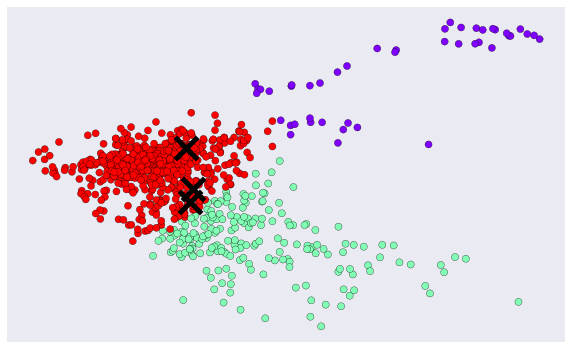

In [363]:

fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='rainbow');
ax.set_xticks([]);
ax.set_yticks([]);

plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=500, linewidths=5,
            color='k', zorder=10)

### Part 6: Additional Analysis
Include any other models you'd like to run here. These can include regressions, classifications, or clusters. 

In [227]:
for i in range(k):
    ds = ap_ops[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

In [365]:
colormap = np.array(['red', 'blue', 'yellow'])
ap_ops.columns

Index([u'airport', u'year', u'departures_for_metric_computation',
       u'arrivals_for_metric_computation', u'percent_on-time_gate_departures',
       u'percent_on-time_airport_departures', u'percent_on-time_gate_arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average_taxi_out_delay', u'average_airport_departure_delay',
       u'average_airborne_delay', u'average_taxi_in_delay',
       u'average_block_delay', u'average_gate_arrival_delay', u'ap_code'],
      dtype='object')

IndexError: index 3 is out of bounds for axis 1 with size 3

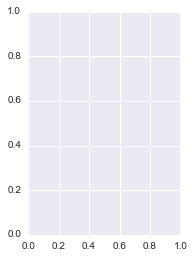

In [367]:
plt.subplot(1, 2, 1)
plt.scatter(x.average_gate_departure_delay, x.average_taxi_in_delay, x.average_airborne_delay, c=colormap[y], s=40)
plt.title('Actual Classification')
 
plt.subplot(1, 2, 2)
plt.scatter(x.average_gate_departure_delay, x.average_taxi_in_delay, x.average_airborne_delay, c=colormap[labels], s=40)
plt.title('K-Means Classification')

In [368]:
predY = np.choose(labels, [1, 0, 2]).astype(np.int64)


In [373]:
metrics.accuracy_score(y, predY)


0.0011890606420927466

In [370]:
metrics.silhouette_score(y, predY, metric='euclidean')


/Users/cguy/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/cguy/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/cguy/anaconda/lib/python2.7/site-packages/sklearn/metrics/cluster/unsupervised.py:193: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 841
  a = np.mean(distances_row[mask])


IndexError: index 1 is out of bounds for axis 1 with size 1

In [371]:
print(metrics.classification_report(y, predY))


             precision    recall  f1-score   support

          0       0.00      0.00      0.00        11
          1       0.02      0.09      0.04        11
          2       0.00      0.00      0.00        11
          3       0.00      0.00      0.00        11
          4       0.00      0.00      0.00        11
          5       0.00      0.00      0.00        11
          6       0.00      0.00      0.00        11
          7       0.00      0.00      0.00        11
          8       0.00      0.00      0.00        11
          9       0.00      0.00      0.00        11
         10       0.00      0.00      0.00        11
         11       0.00      0.00      0.00        11
         12       0.00      0.00      0.00        11
         13       0.00      0.00      0.00        11
         14       0.00      0.00      0.00        11
         15       0.00      0.00      0.00        11
         16       0.00      0.00      0.00        11
         17       0.00      0.00      0.00   

In [372]:
print(metrics.confusion_matrix(y, predY))


[[ 0  0 11 ...,  0  0  0]
 [ 0  1 10 ...,  0  0  0]
 [11  0  0 ...,  0  0  0]
 ..., 
 [ 0  0 11 ...,  0  0  0]
 [ 0  0 11 ...,  0  0  0]
 [ 0 11  0 ...,  0  0  0]]


### Part 7: Write an analysis plan of your findings 

Create a writeup on the interpretation of findings including an executive summary with conclusions and next steps. Put it on your blog, and include the link here.

Which operational features are most correlated with delays?

What should the airport's next steps be?

### Bonus: Copy your Database to AWS 

Make sure to properly document all of the features of your dataset

### Bonus: Create a 3-Dimensional Plot of your new dataset with PCA applied

In [ ]:
understand the distribution, characteristics, and components of individual airports operations that are leading to these delays

Understand the characteristics and groupings of airports based on a dataset of departure and operational delays

Understand the characteristics and groupings of airports based on a dataset of departure and operational delays

Which operational features are most correlated with delays?


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#Read in data & create total column
stacked_bar_data = pd.read_csv("C:\stacked_bar.csv")
stacked_bar_data["total"] = stacked_bar_data.Series1 + stacked_bar_data.Series2

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.Series1, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Bottom Bar', 'Top Bar'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Y-axis label")
bottom_plot.set_xlabel("X-axis label")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)
view raw